# Proyek Analisis Data: Air Quality Data Set
- **Nama:** Muhammad Farhan
- **Email:** M322D4KY1871@bangkit.academy
- **ID Dicoding:** muhammadfarhan0121

## Menentukan Pertanyaan Bisnis

- Bagaimana kualitas udara berdasarkan parameter SO2 di setiap stasiun sepanjang tahun 2013?
- Bagaimana dampak kandungan O3 terhadap kondisi temperature pada satu statiun?

## Import Semua Packages/Library yang Digunakan

In [3]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Data Wrangling

### Gathering Data

In [45]:
# Direktori yang berisi file CSV
path_folder = 'PRSA_Data_20130301-20170228'

# Daftar untuk menyimpan semua DataFrame
daftar_df = []

# Loop melalui semua file dalam direktori
for nama_file in os.listdir(path_folder):
    if nama_file.endswith('.csv'):
        # Baca file CSV ke dalam DataFrame
        path_file = os.path.join(path_folder, nama_file)
        df = pd.read_csv(path_file)
        # Tambahkan DataFrame ke dalam daftar
        daftar_df.append(df)

# Gabungkan semua DataFrame menjadi satu DataFrame
df_gabungan = pd.concat(daftar_df, ignore_index=True)

# Simpan DataFrame gabungan ke dalam file CSV baru
df_gabungan.to_csv('semua_data.csv', index=False)

print("File CSV digabungkan berhasil menjadi 'semua_data.csv'")


File CSV digabungkan berhasil menjadi 'semua_data.csv'


In [46]:

# Baca file CSV ke dalam DataFrame
data = pd.read_csv('semua_data.csv')

# Tampilkan beberapa baris pertama dari DataFrame
print(data.head())



   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


### Assessing Data

In [47]:
# Periksa nilai yang hilang
missing_values = data.isnull().sum()
print("Jumlah nilai yang hilang per kolom:")
print(missing_values)


Jumlah nilai yang hilang per kolom:
No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64


Dataset tersebut berisi kolom berikut:

     No: Identifikasi numerik untuk setiap baris.
     tahun, bulan, hari, jam: Indikator tanggal dan waktu.
     PM2.5, PM10, SO2, NO2, CO, O3: Konsentrasi berbagai polutan udara.
     TEMP: Suhu dalam derajat Celsius.
     PRES: Tekanan atmosfer dalam hPa.
     DEWP: Suhu titik rosak dalam derajat Celsius.
     RAIN: Jumlah curah hujan dalam mm.
     wd: Arah angin.
     WSPM: Kecepatan angin dalam m/s.
     station: Nama stasiun pemantauan.

In [48]:
# Periksa tipe data dari setiap kolom
data_types = data.dtypes
print("\nTipe data dari setiap kolom:")
print(data_types)



Tipe data dari setiap kolom:
No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [49]:
# Periksa baris duplikat
duplicate_rows = data[data.duplicated()]

if duplicate_rows.empty:
    print("Tidak ditemukan baris duplikat.")
else:
    print("Baris duplikat ditemukan:")
    print(duplicate_rows)


Tidak ditemukan baris duplikat.


In [50]:
# Dapatkan nilai unik dalam atribut 'station'
unique_stations = data['station'].unique()

print("Unique values in 'station' attribute:")
for station in unique_stations:
    print(station)
    
# Hitung jumlah nilai unik dalam atribut 'station'
unique_station_count = data['station'].value_counts()

print("\nCount of unique values in 'station' attribute:")
print(unique_station_count)

Unique values in 'station' attribute:
Aotizhongxin
Changping
Dingling
Dongsi
Guanyuan
Gucheng
Huairou
Nongzhanguan
Shunyi
Tiantan
Wanliu
Wanshouxigong

Count of unique values in 'station' attribute:
station
Aotizhongxin     35064
Changping        35064
Dingling         35064
Dongsi           35064
Guanyuan         35064
Gucheng          35064
Huairou          35064
Nongzhanguan     35064
Shunyi           35064
Tiantan          35064
Wanliu           35064
Wanshouxigong    35064
Name: count, dtype: int64


### Cleaning Data

In [51]:
# Membersihkan Data: Mengelola Nilai yang Hilang

# Menghapus baris di mana semua kolom polutan kritis hilang
critical_pollutants = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']
data_clean = data.dropna(subset=critical_pollutants, how='all')

# Menangani nilai yang hilang pada variabel yang berhubungan dengan cuaca ('TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM')
# Strategi forward fill digunakan untuk mengisi nilai yang hilang pada variabel cuaca
weather_variables = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
data_clean[weather_variables] = data_clean[weather_variables].fillna(method='ffill')

# Memeriksa nilai yang hilang setelah proses pembersihan
missing_values_after_cleaning = data_clean.isnull().sum()

missing_values_after_cleaning


C:\Users\tmali\AppData\Local\Temp\ipykernel_17552\2056189172.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_clean[weather_variables] = data_clean[weather_variables].fillna(method='ffill')
C:\Users\tmali\AppData\Local\Temp\ipykernel_17552\2056189172.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[weather_variables] = data_clean[weather_variables].fillna(method='ffill')


No             0
year           0
month          0
day            0
hour           0
PM2.5       3770
PM10        1480
SO2         4052
NO2         7147
CO         15732
O3          8308
TEMP           0
PRES           0
DEWP           0
RAIN           0
wd          1804
WSPM           0
station        0
dtype: int64

Untuk column PM2.5, PM10, SO2, NO2, CO, O3 tidak saya lakukan pengisian missing value dikarenakan column ini krusial dan tidak bisa langsung diisi dengan metode pengisian missing value yang tersedia. 

data.dropna(): Fungsi ini digunakan untuk menghapus baris yang memiliki nilai yang hilang (NaN) dari DataFrame data.

subset=critical_pollutants: Parameter ini menentukan kolom mana yang harus diperiksa untuk nilai yang hilang. Dalam hal ini, hanya kolom yang ada dalam list critical_pollutants yang akan diperiksa.

how='all': Parameter ini menentukan kondisi di mana baris harus dihapus. Dalam hal ini, how='all' berarti bahwa baris hanya akan dihapus jika semua kolom dalam subset memiliki nilai yang hilang. Jika hanya ada satu atau beberapa kolom yang memiliki nilai yang hilang, baris tersebut tidak akan dihapus

In [52]:
# Path file output untuk data bersih
output_file_path = 'clean_data.csv'

# Menyimpan data bersih ke file CSV tanpa menyertakan indeks
data_clean.to_csv(output_file_path, index=False)


## Exploratory Data Analysis (EDA)

### Explore ...

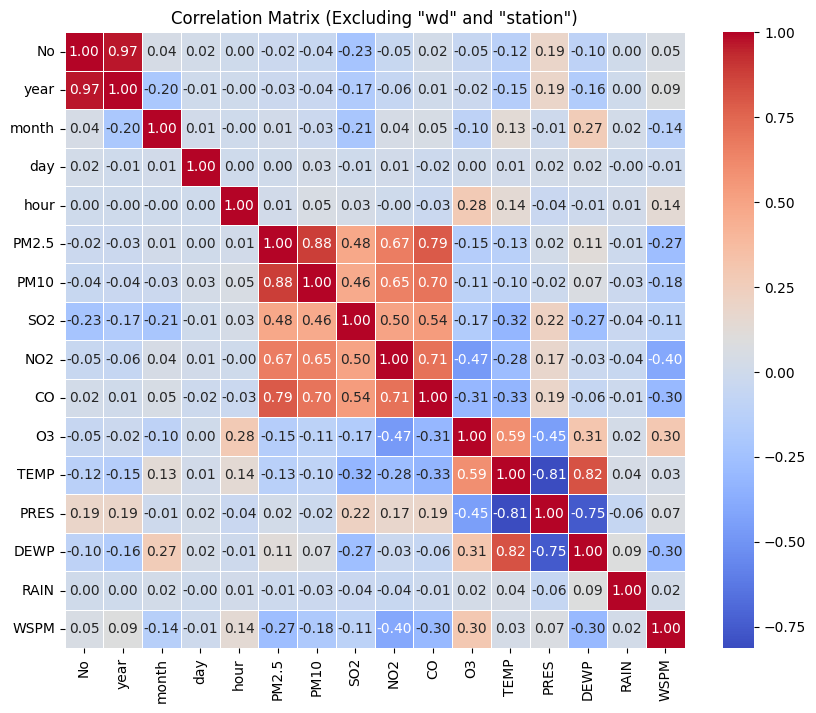

In [53]:
# Menentukan kolom-kolom yang akan dikecualikan dari dataset
columns_to_exclude = ['wd', 'station']
df_subset = data.drop(columns=columns_to_exclude)

# Menghitung matriks korelasi
correlation_matrix = df_subset.corr()

# Plot matriks korelasi sebagai heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Excluding "wd" and "station")')
plt.show()

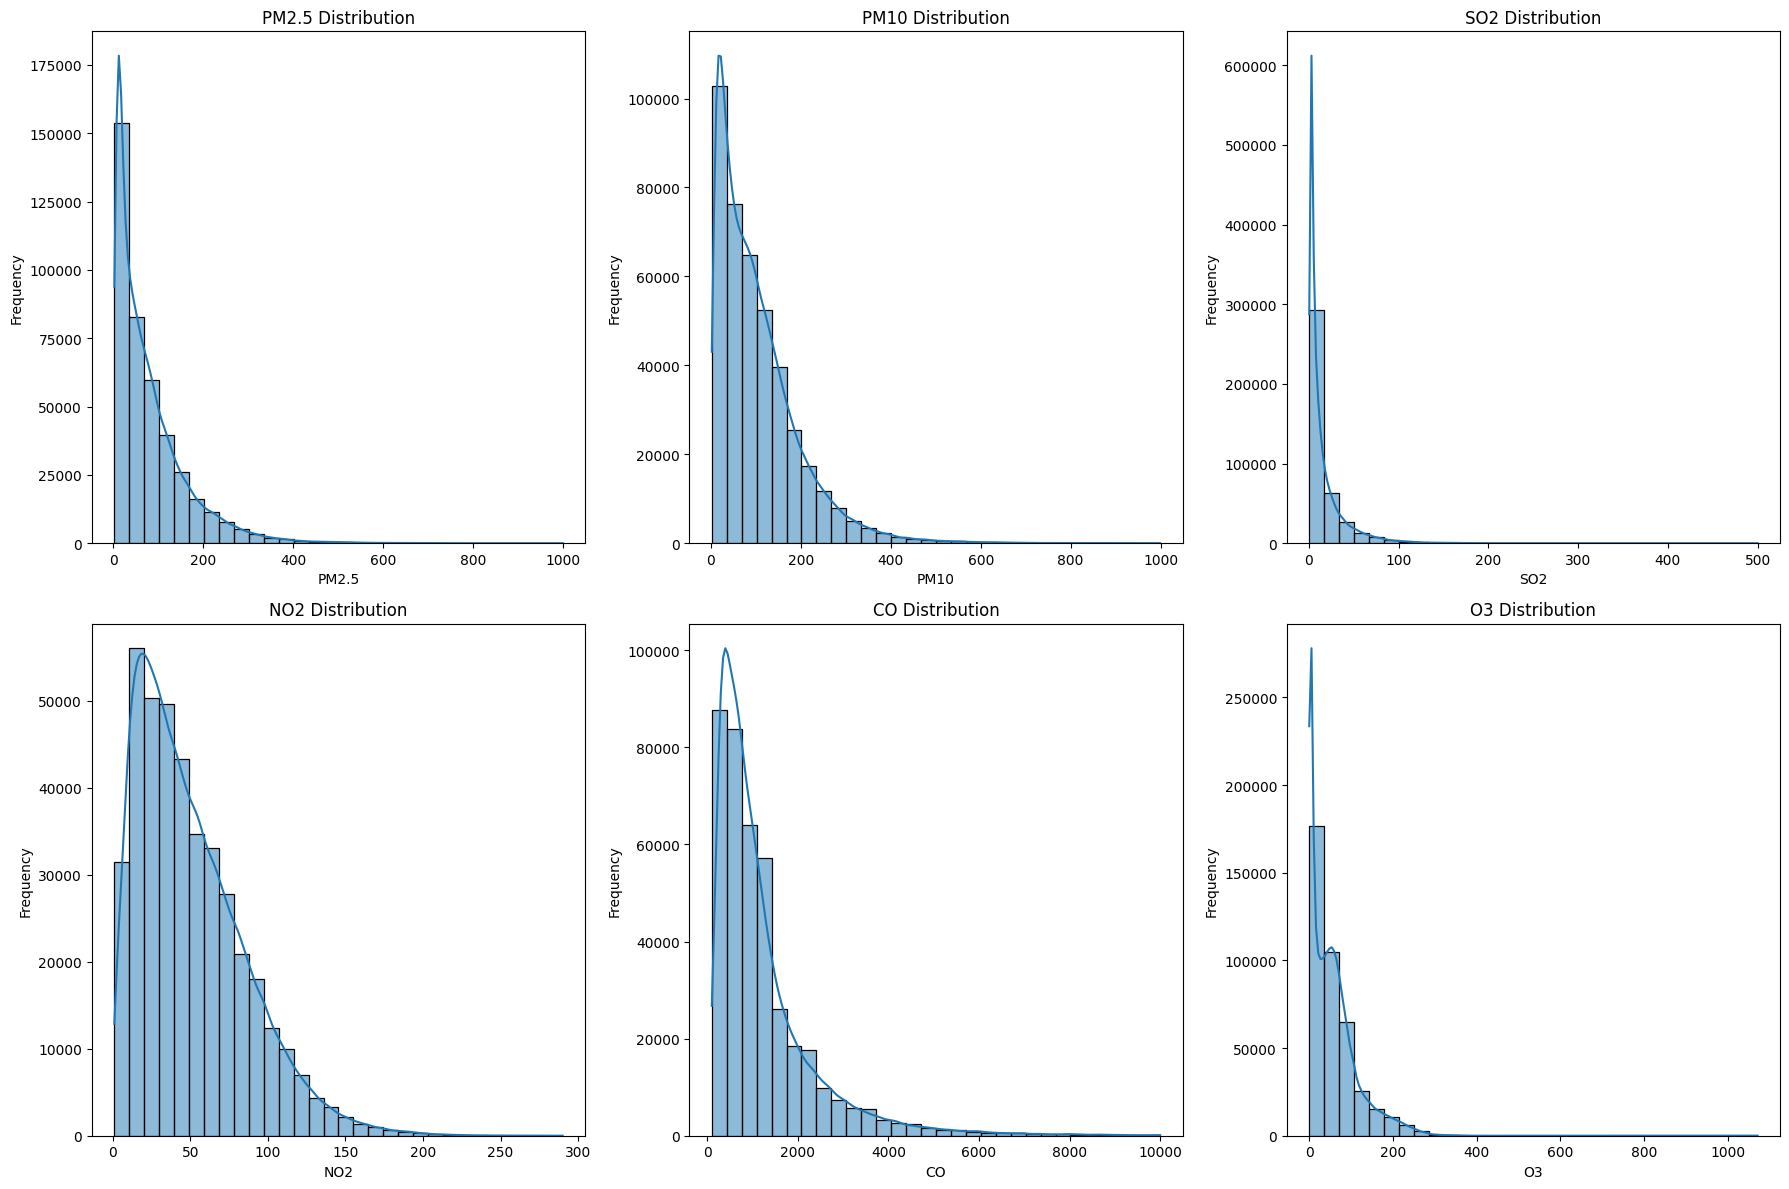

In [54]:

# Daftar kolom polutan
pollutant_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Plot distribusi tiap polutan
plt.figure(figsize=(18, 12))
for i, pollutant in enumerate(pollutant_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data_clean[pollutant],bins=30,  kde=True)
    plt.title(pollutant + " Distribution")
    plt.xlabel(pollutant)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


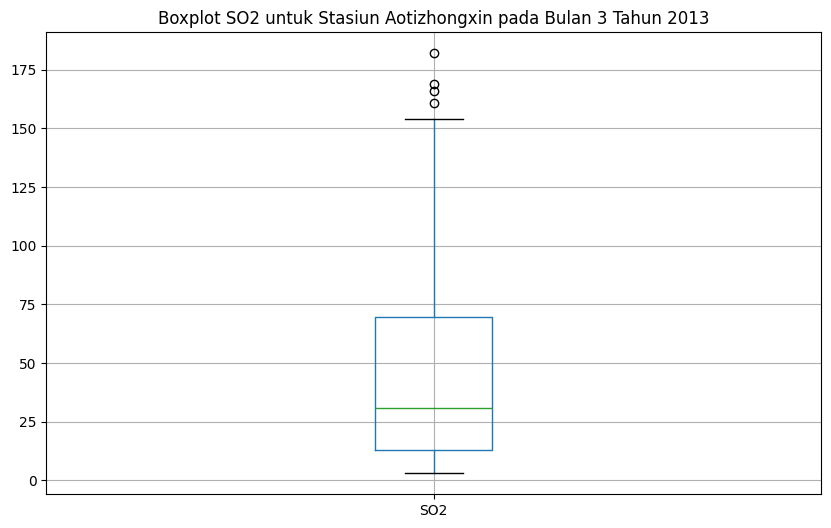

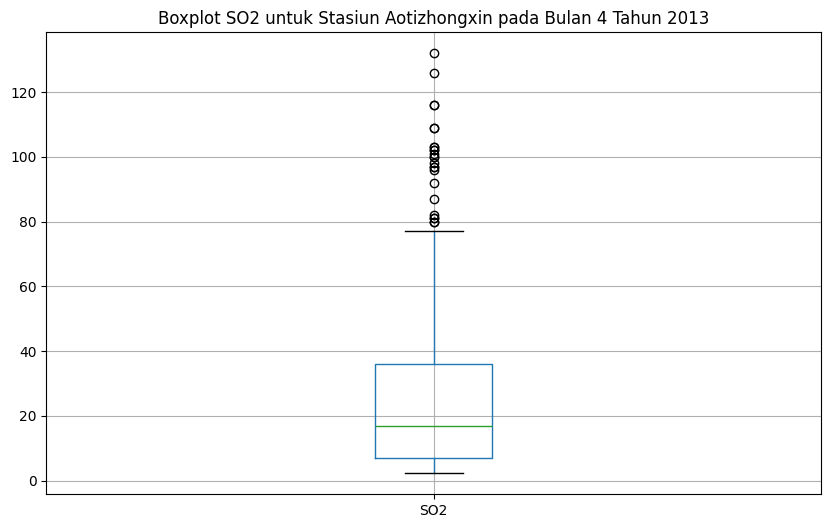

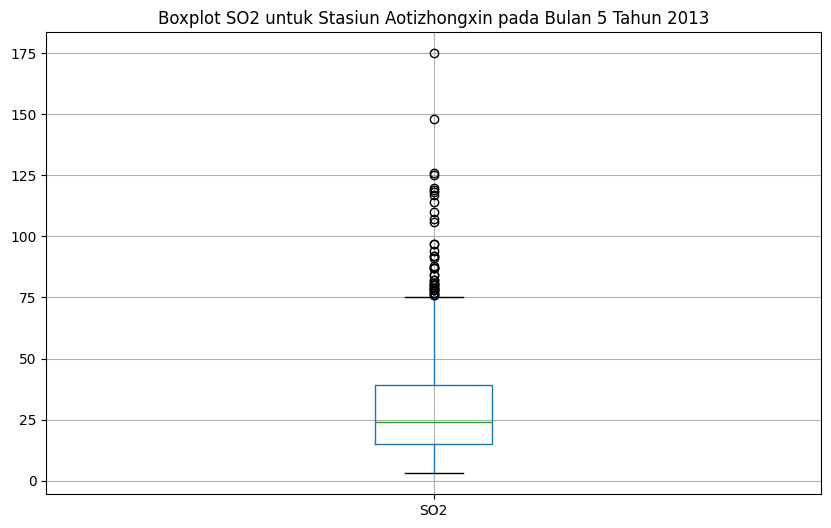

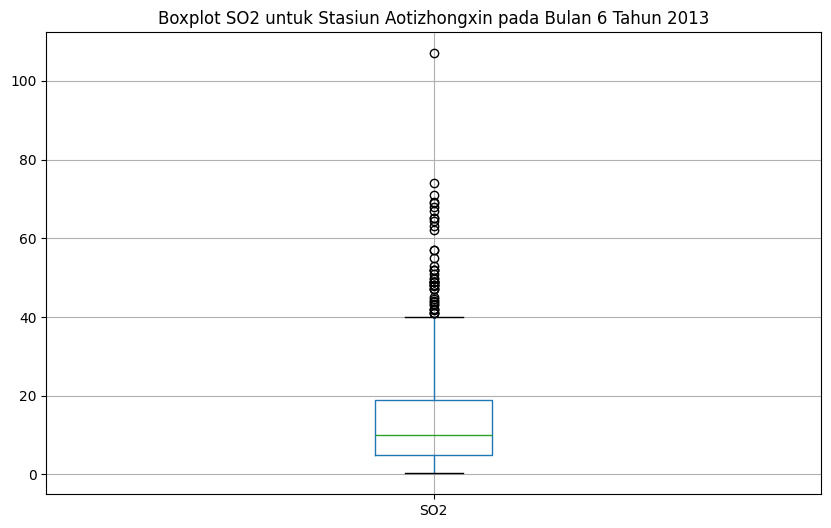

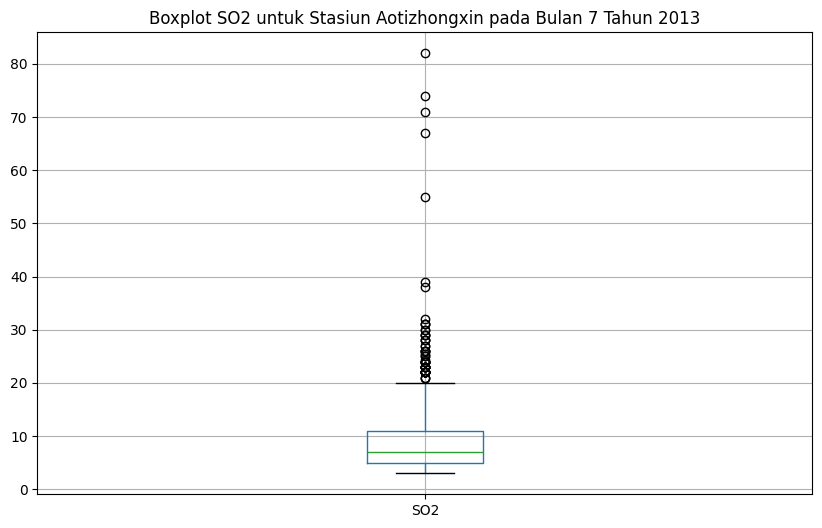

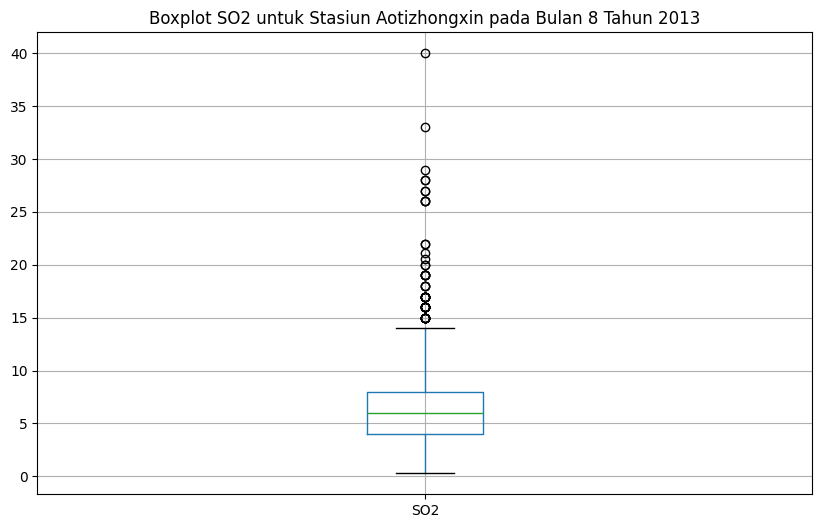

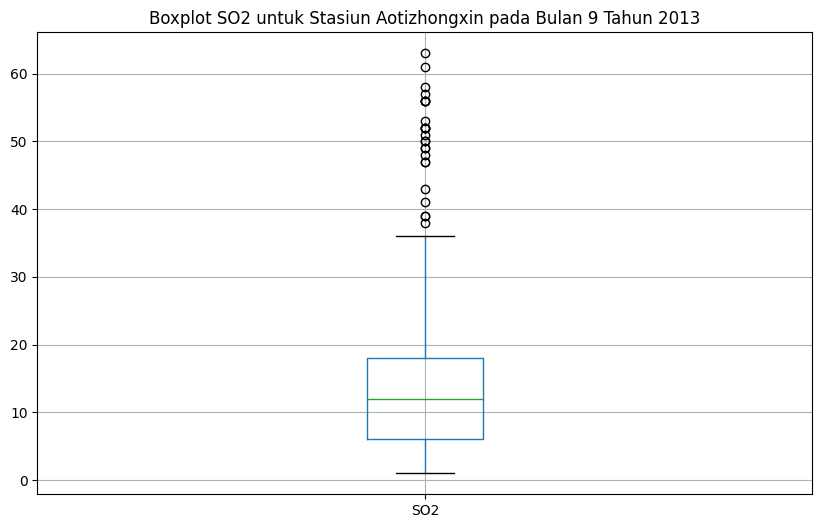

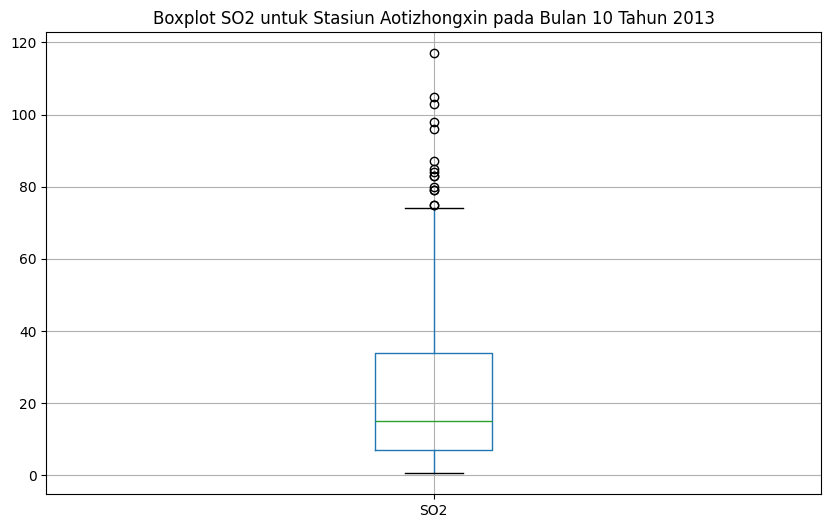

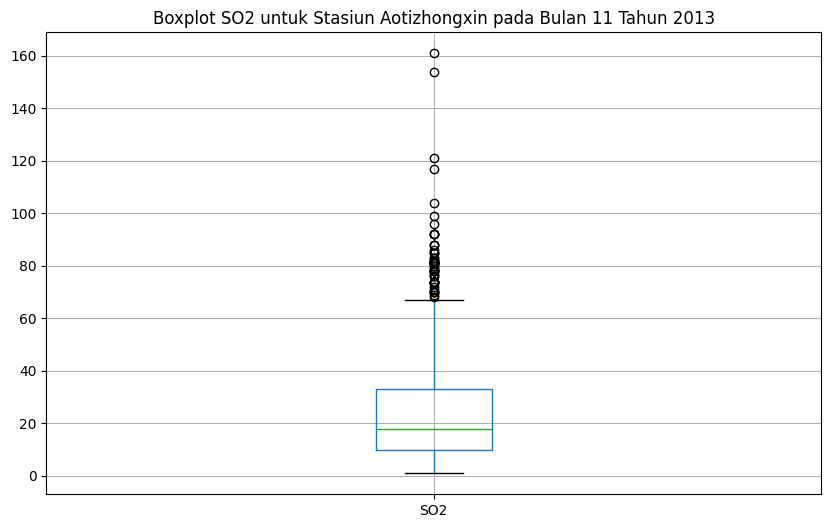

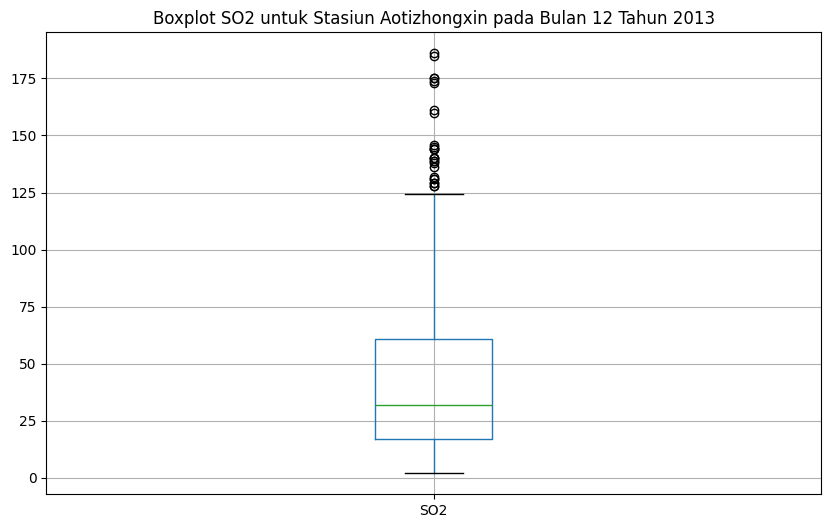

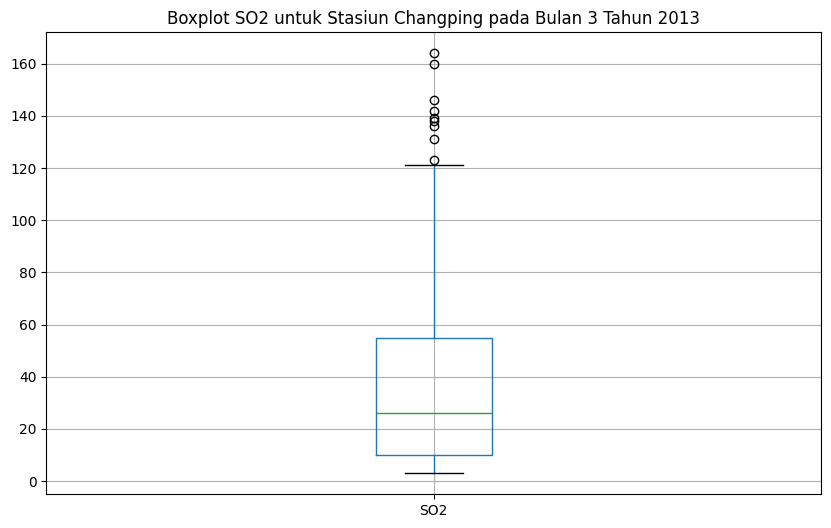

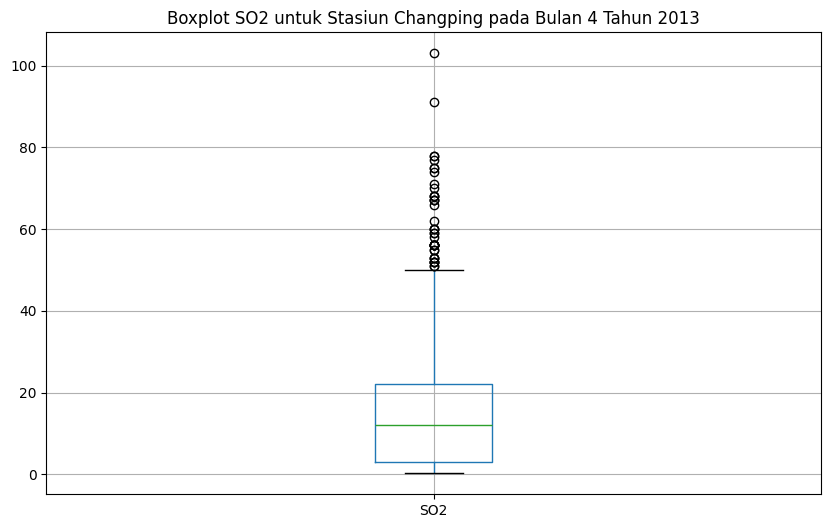

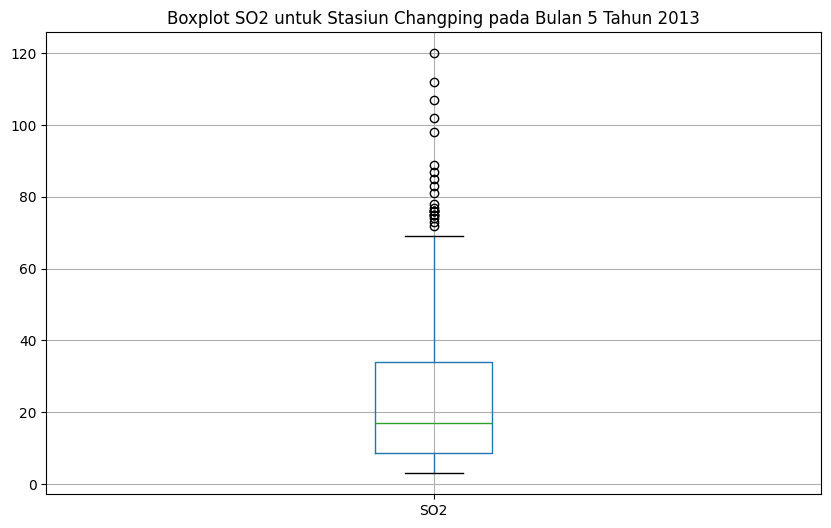

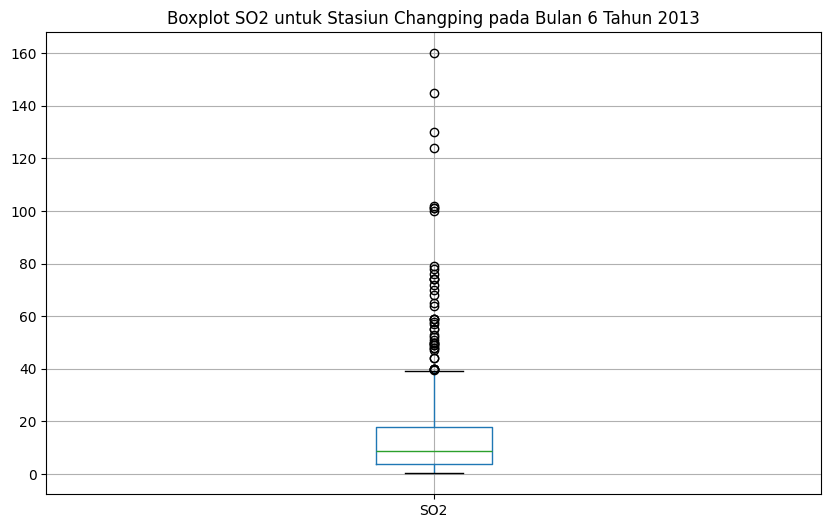

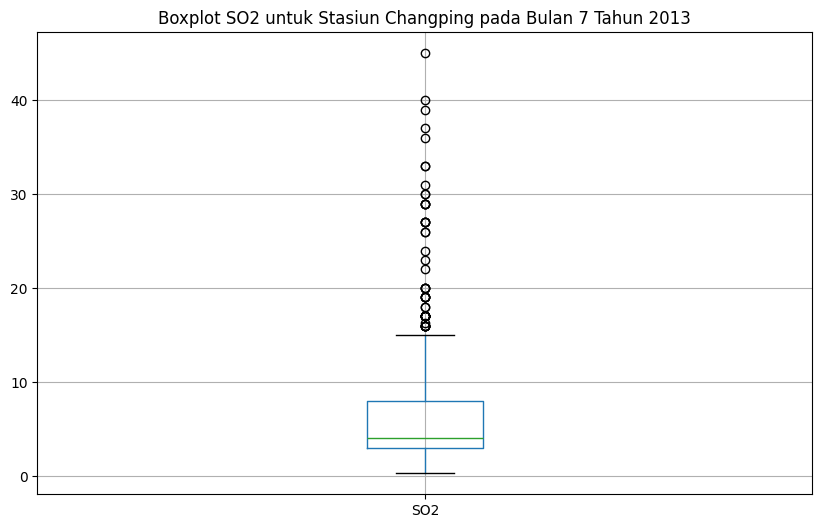

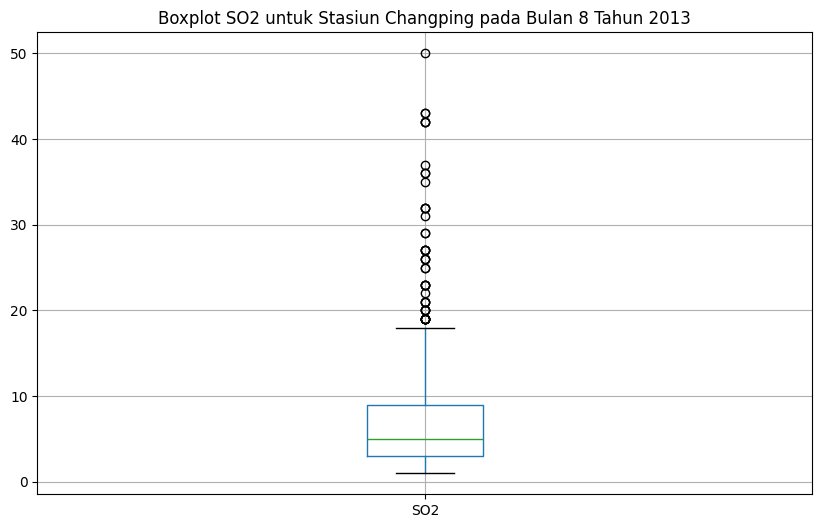

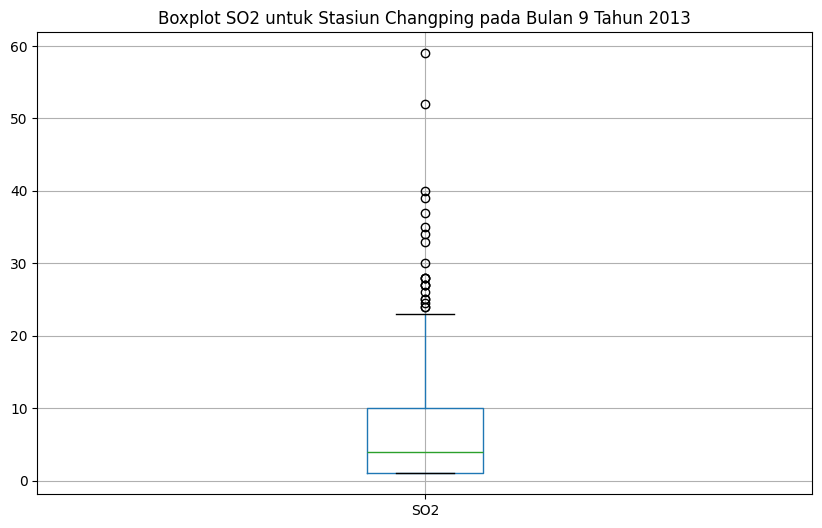

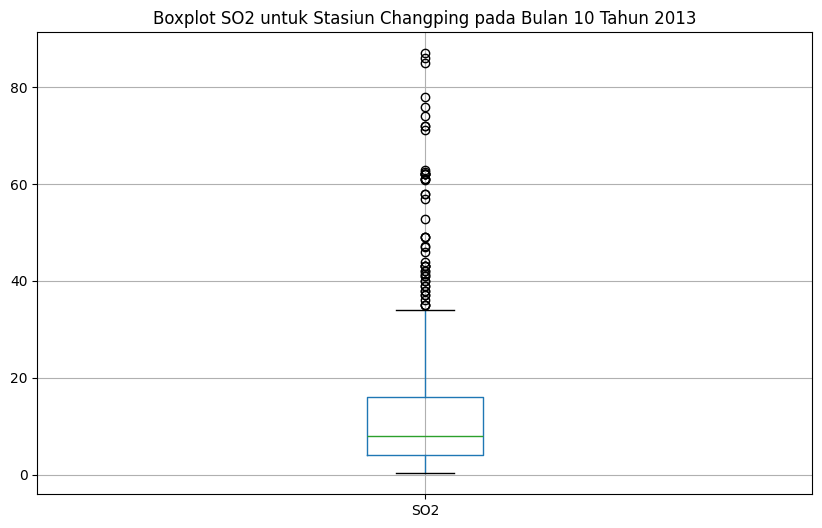

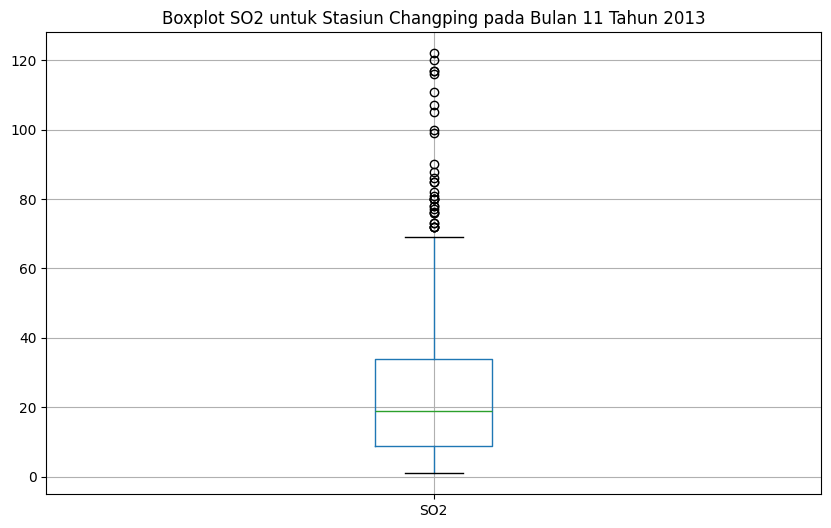

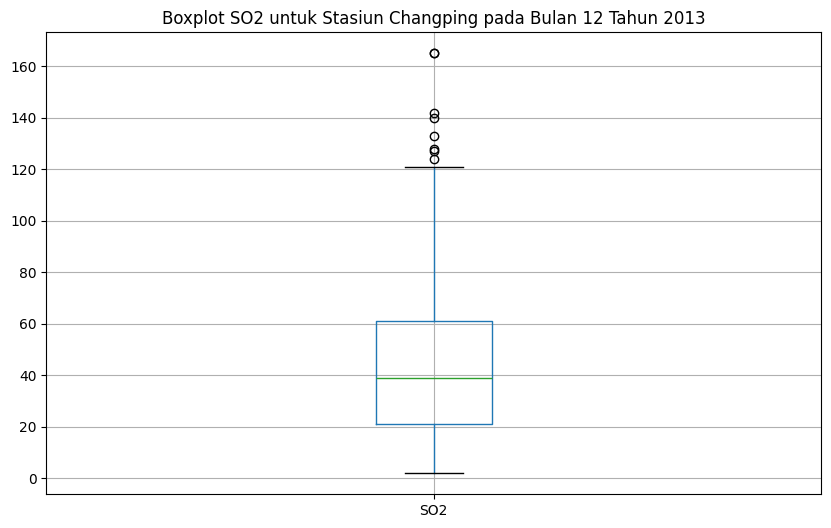

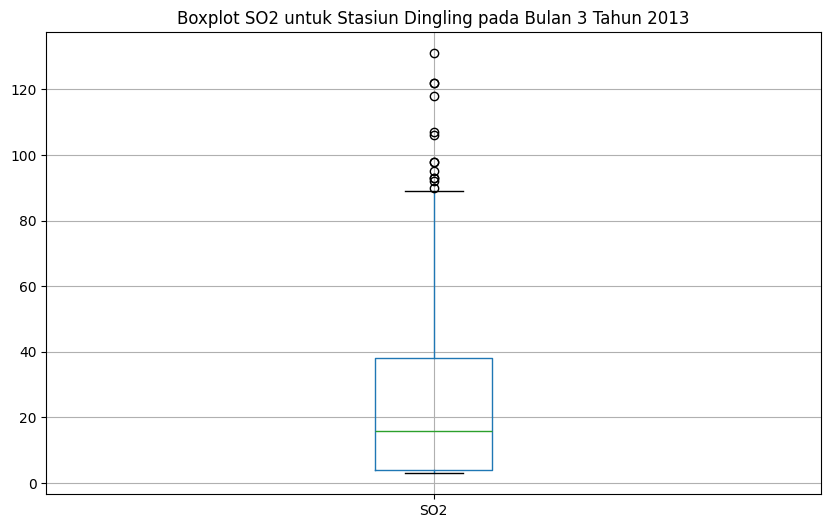

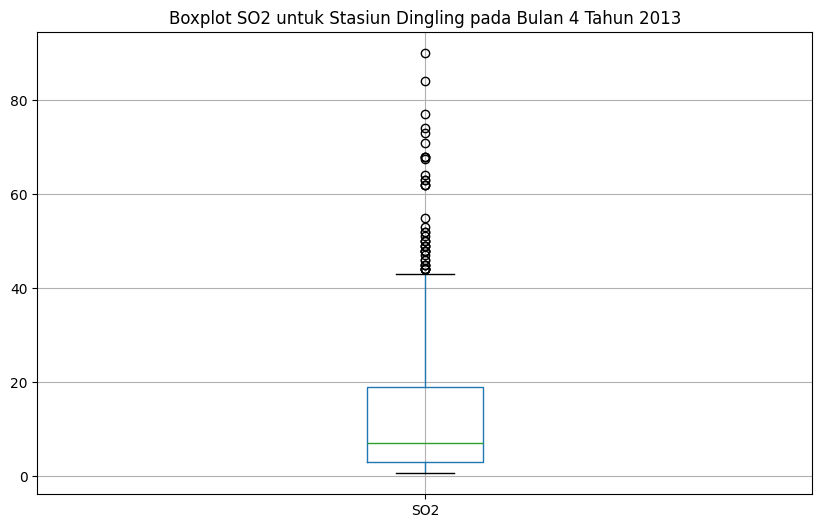

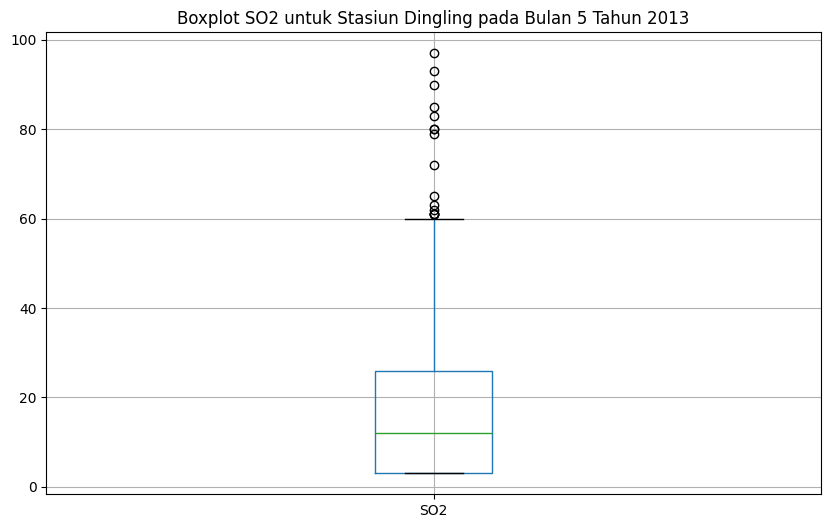

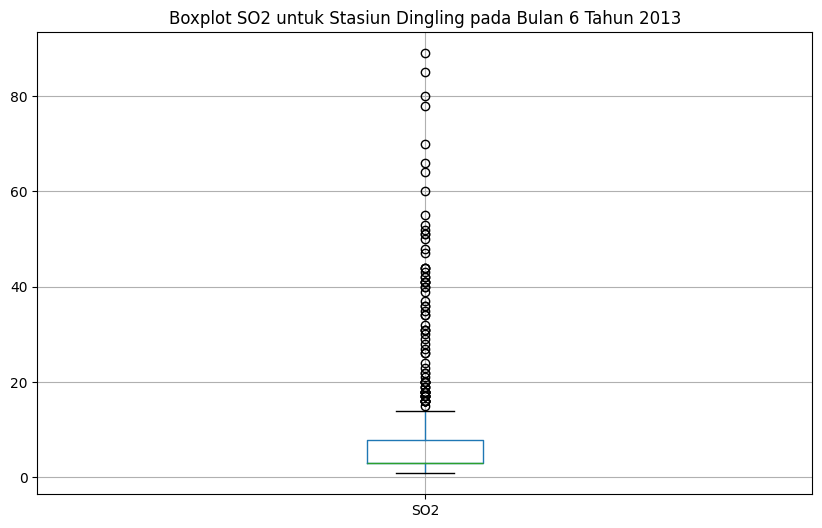

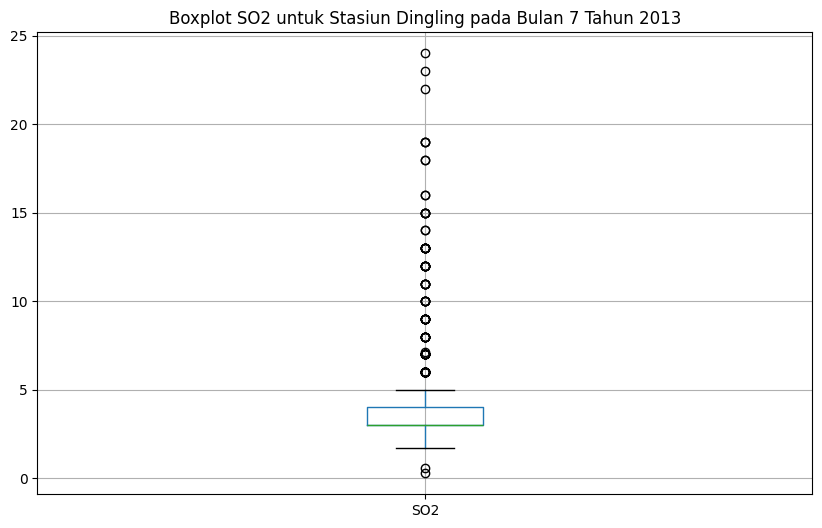

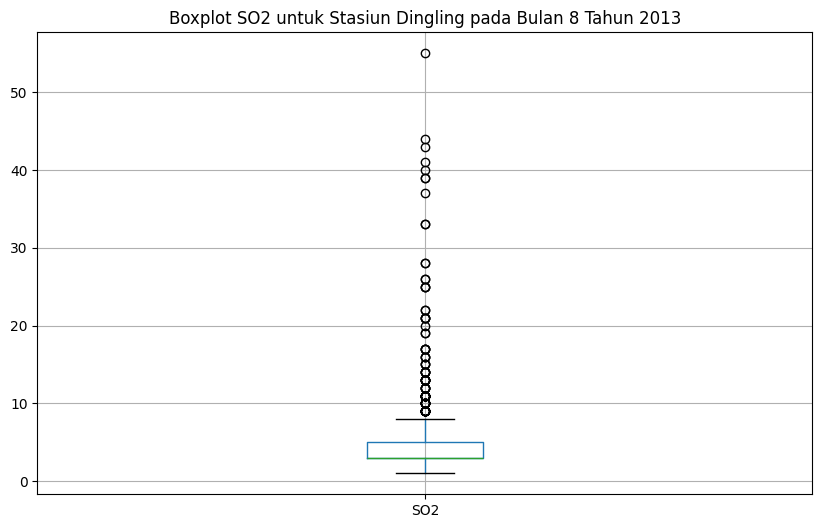

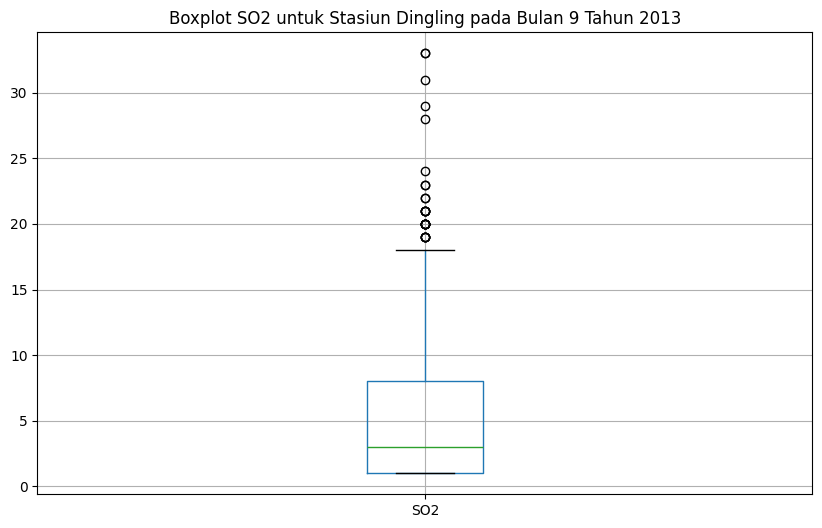

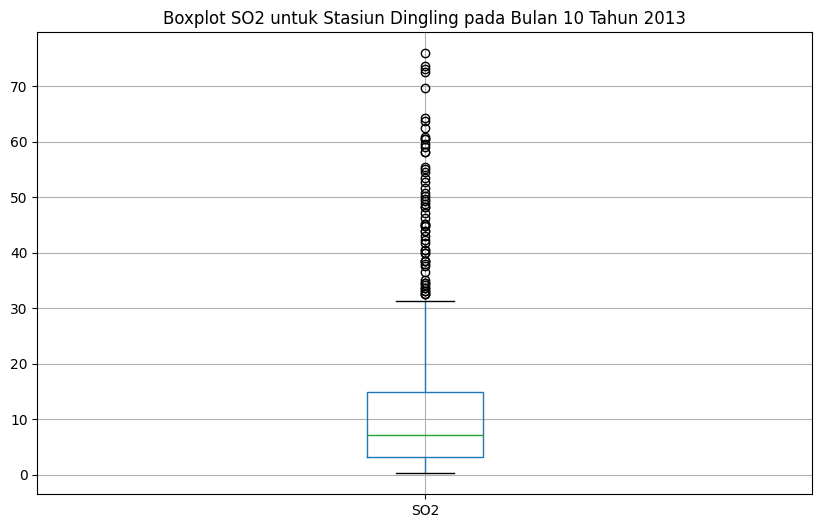

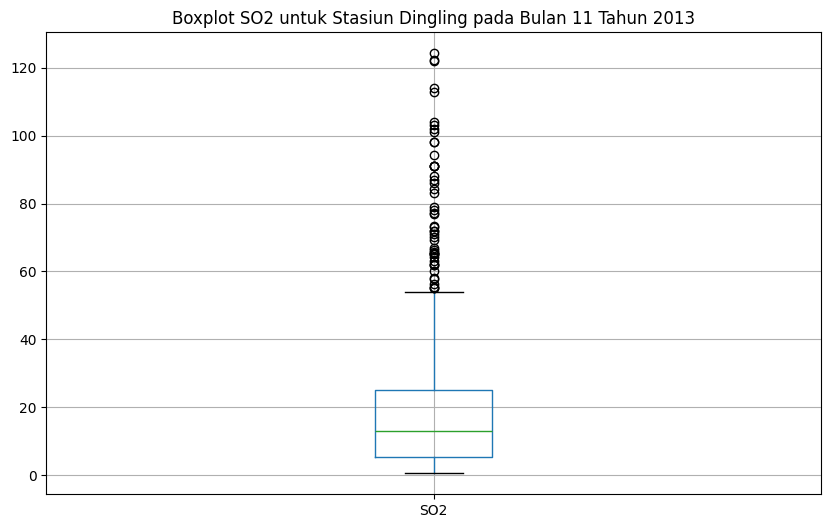

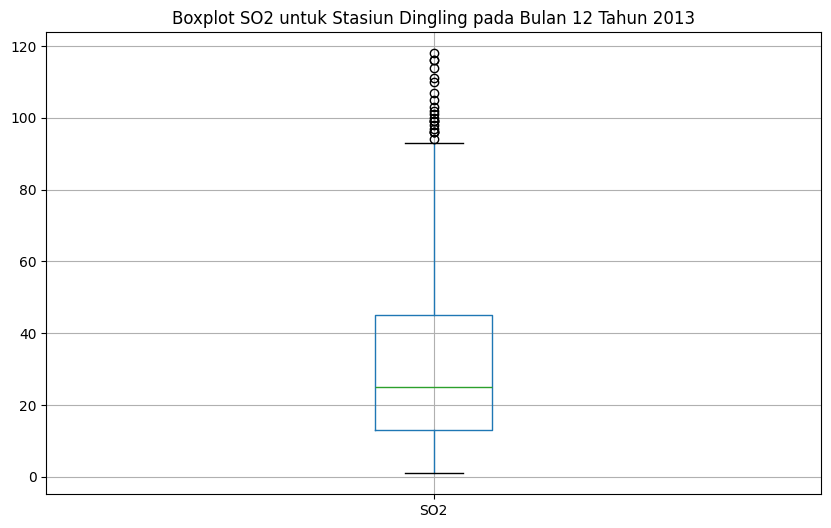

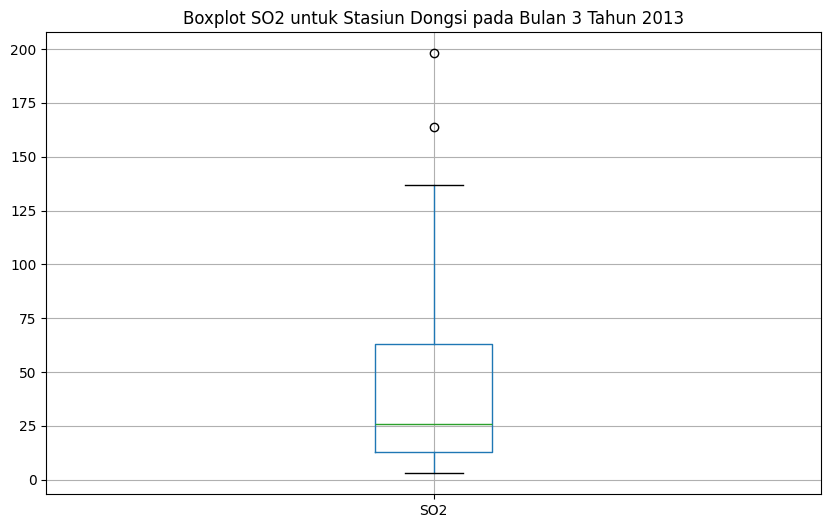

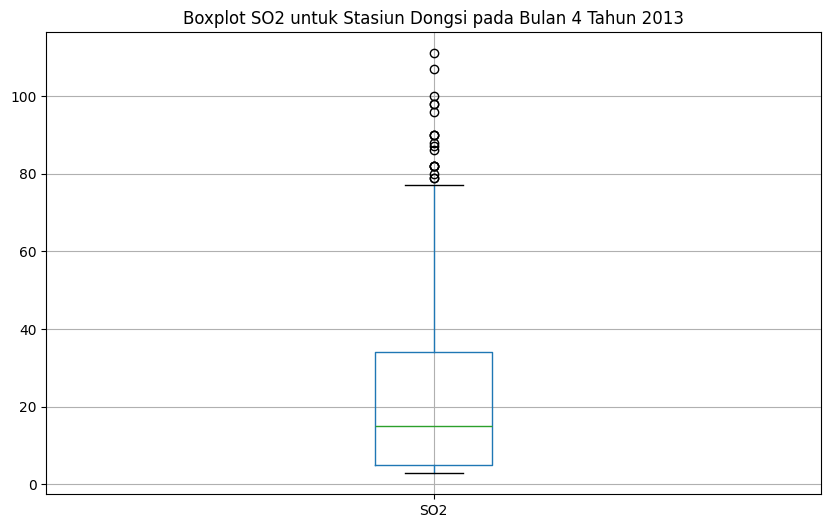

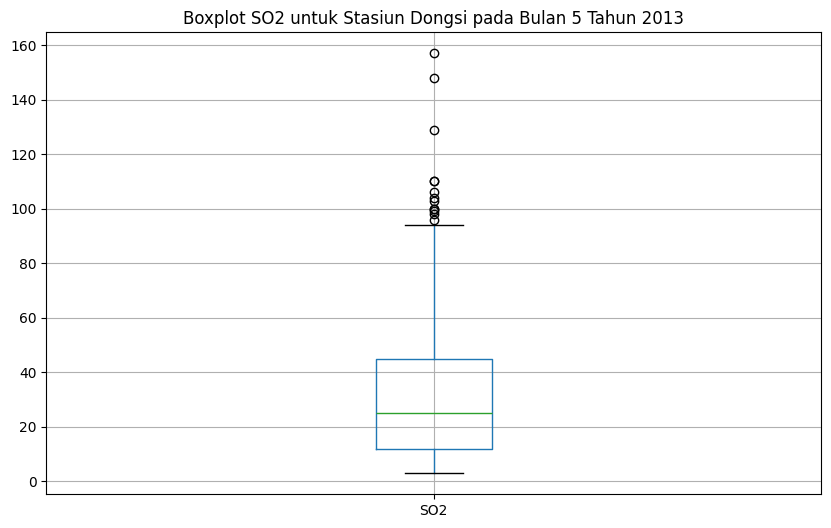

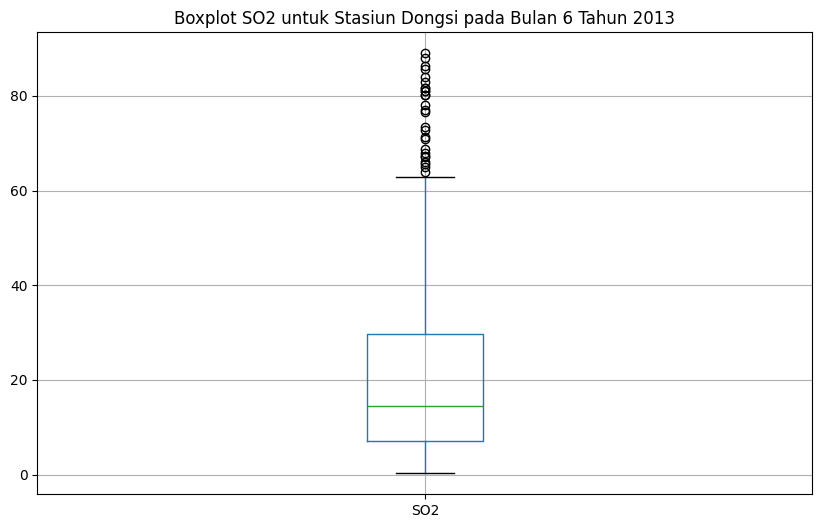

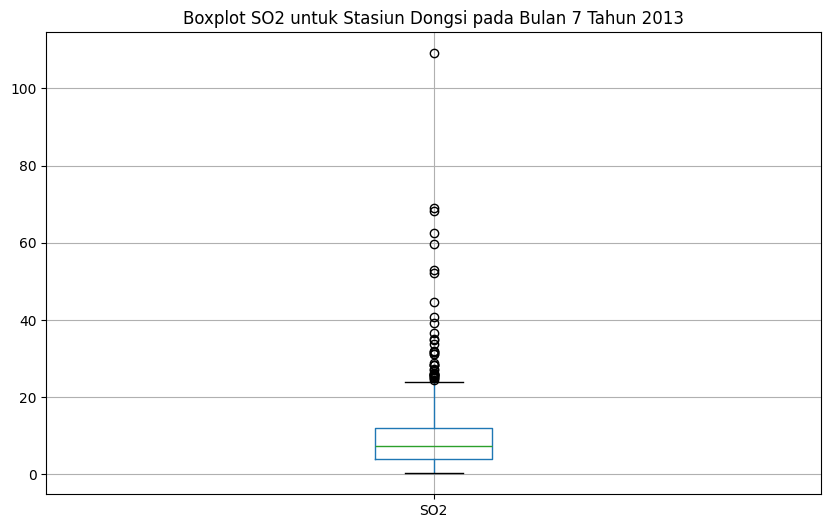

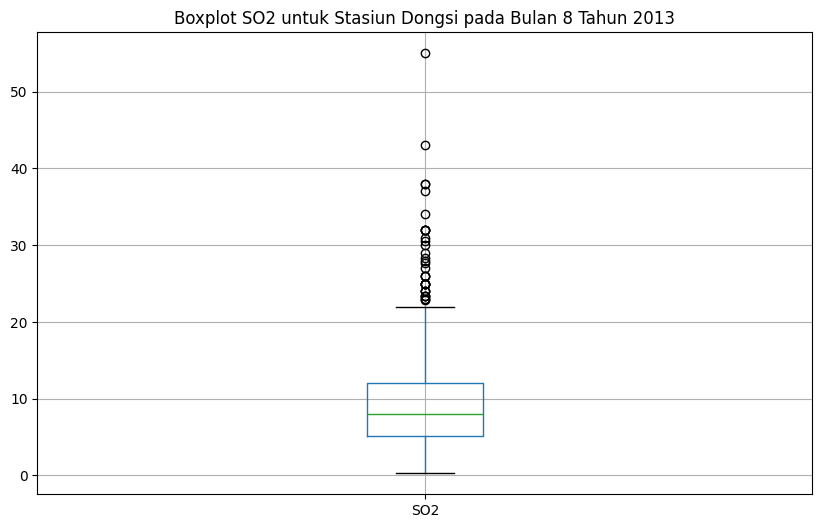

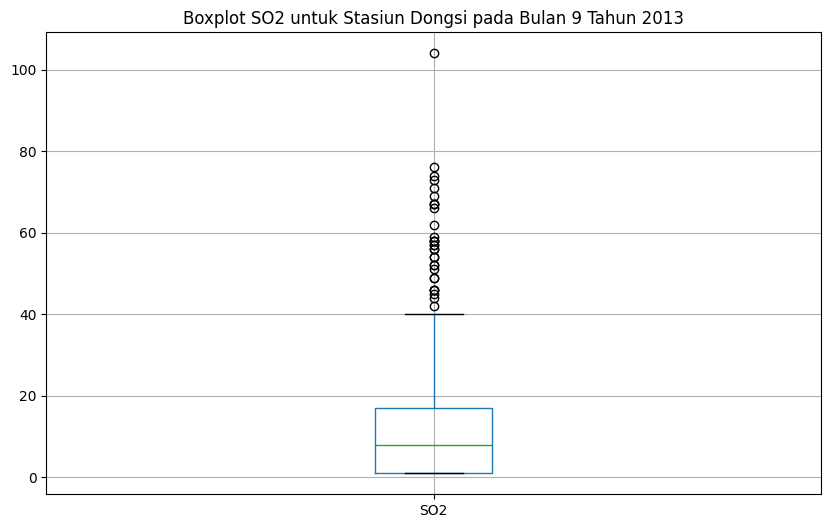

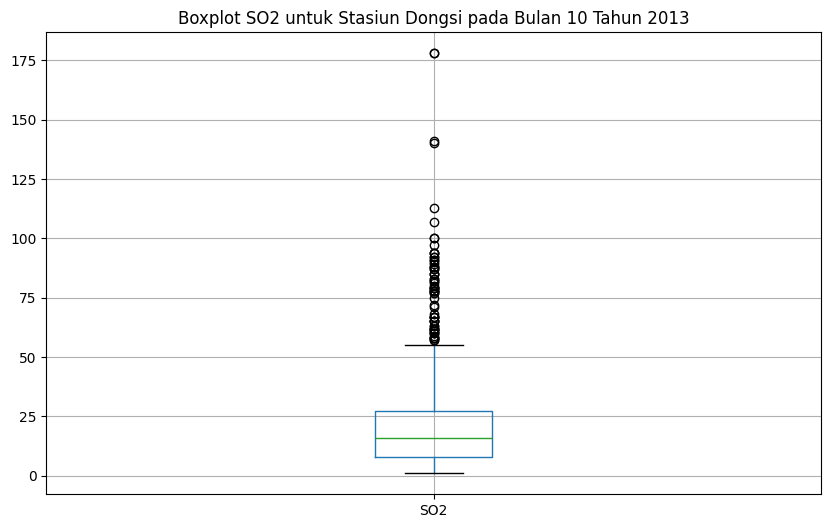

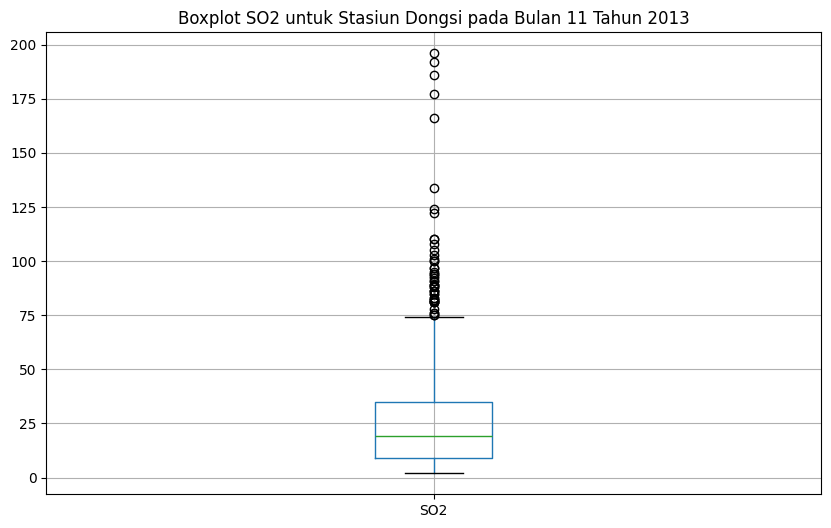

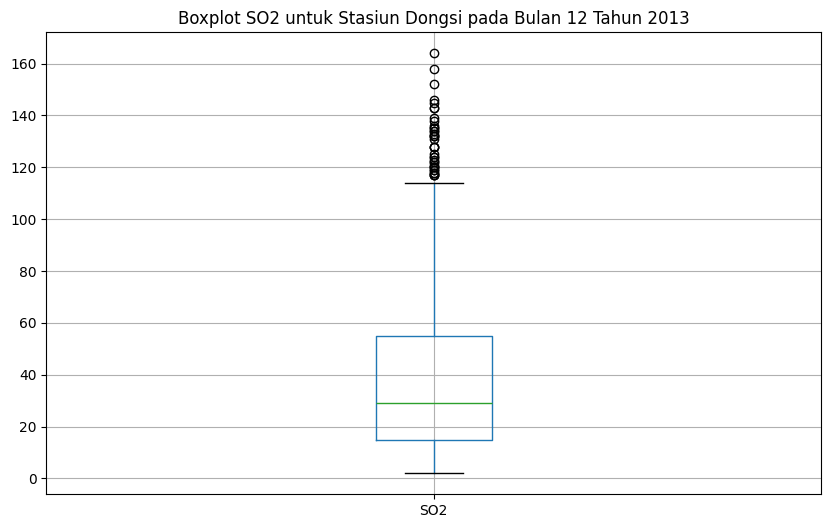

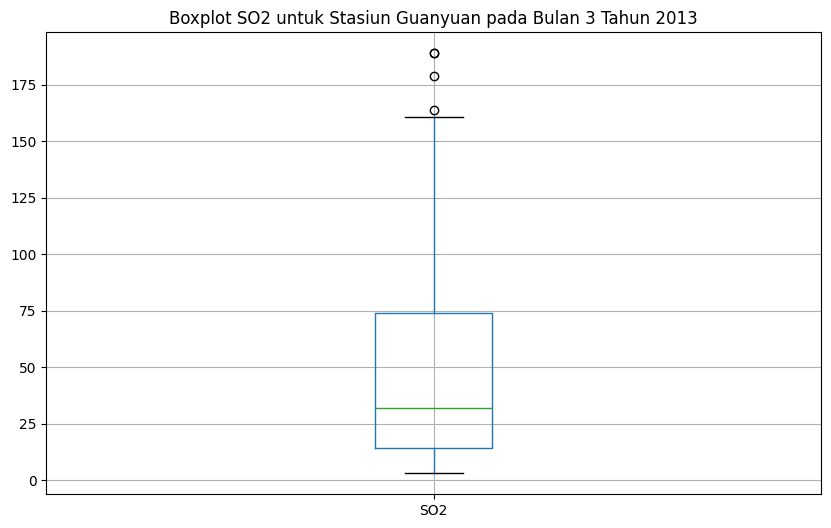

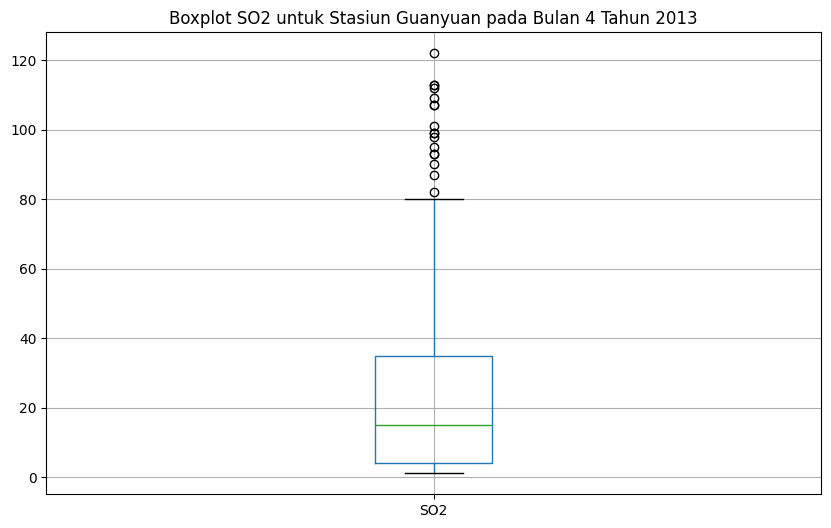

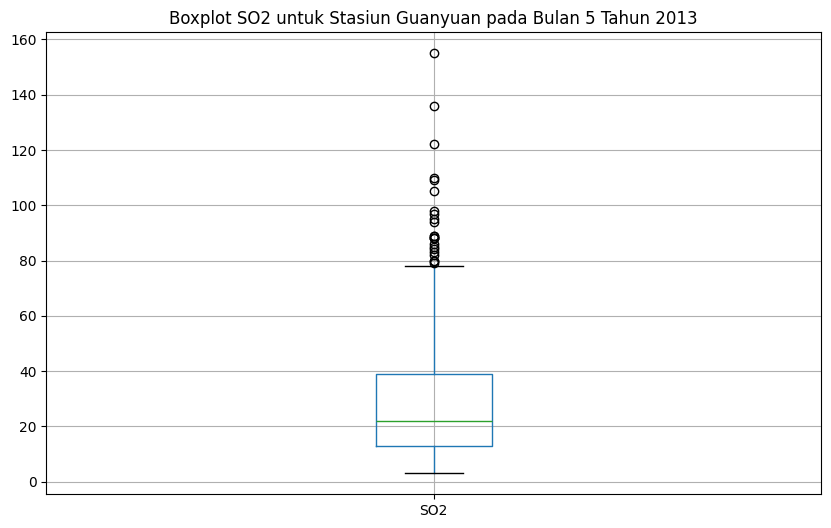

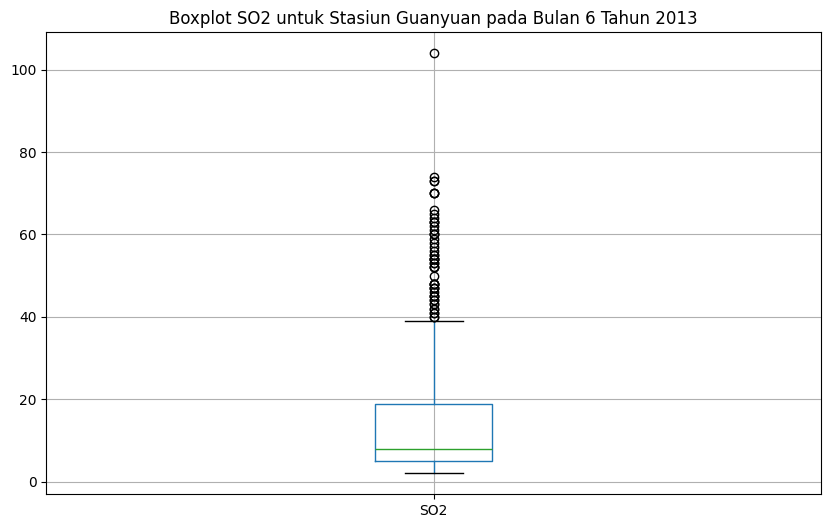

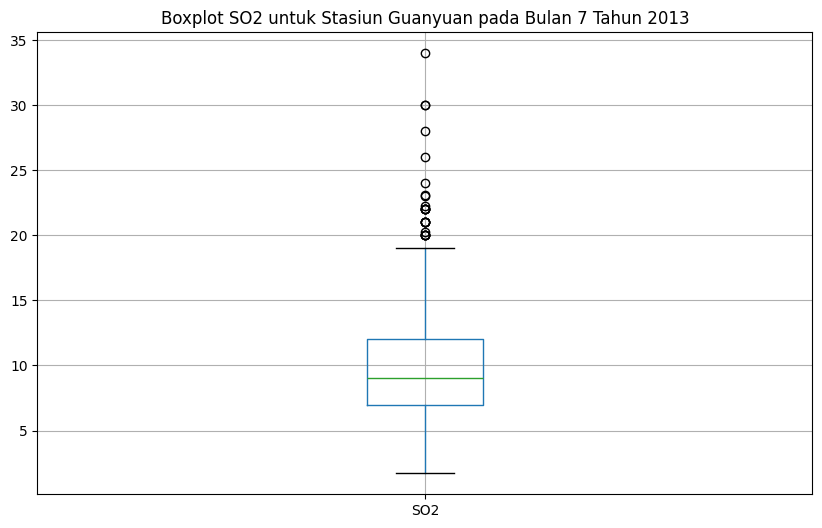

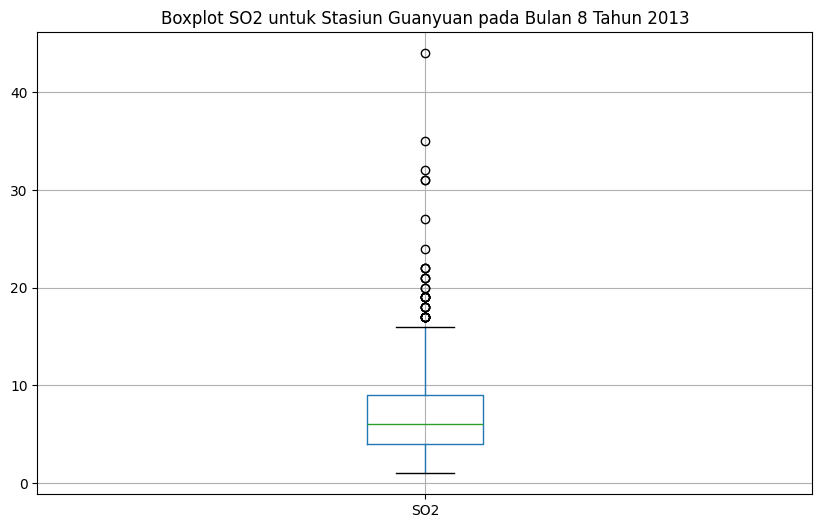

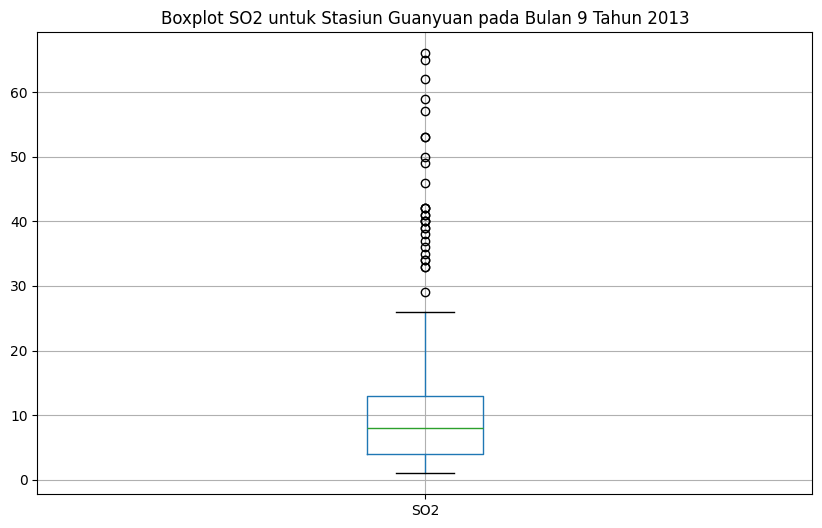

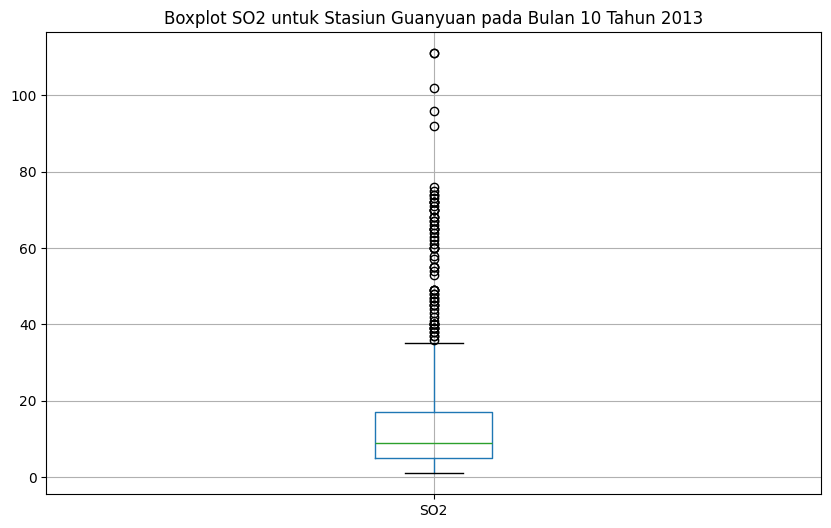

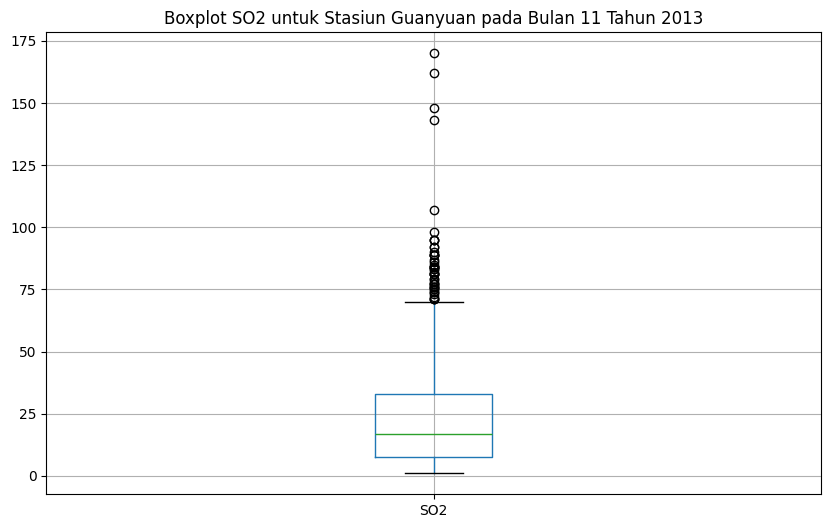

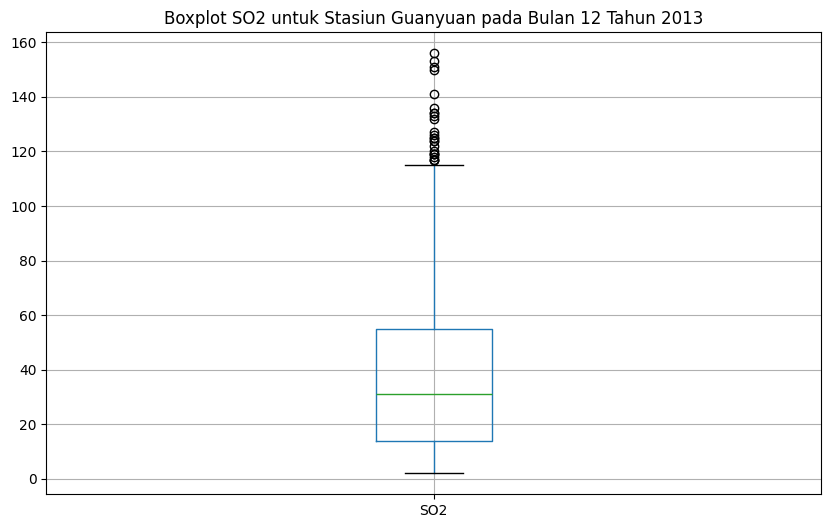

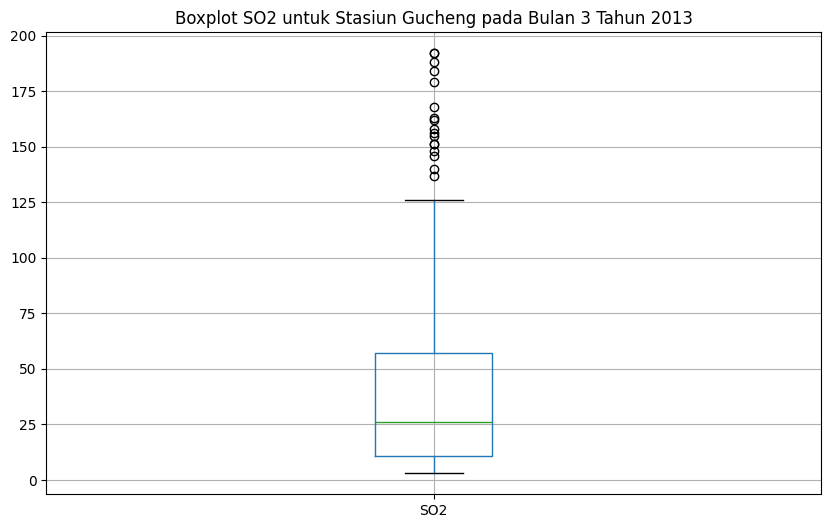

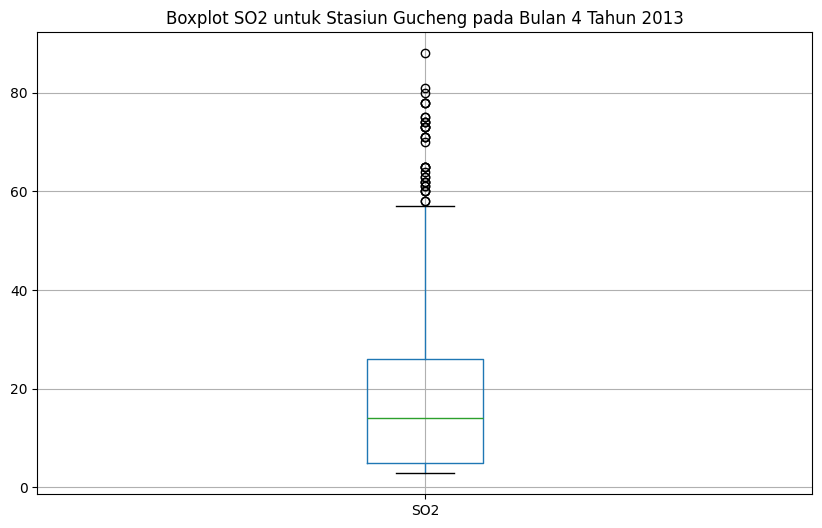

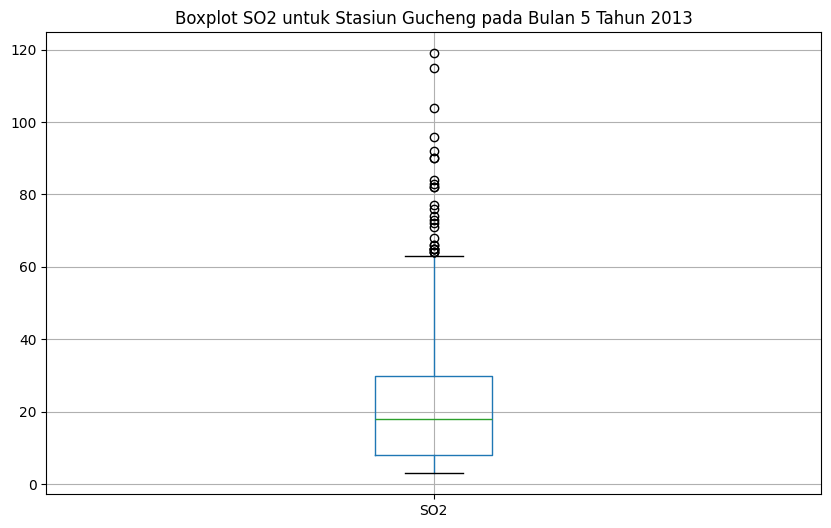

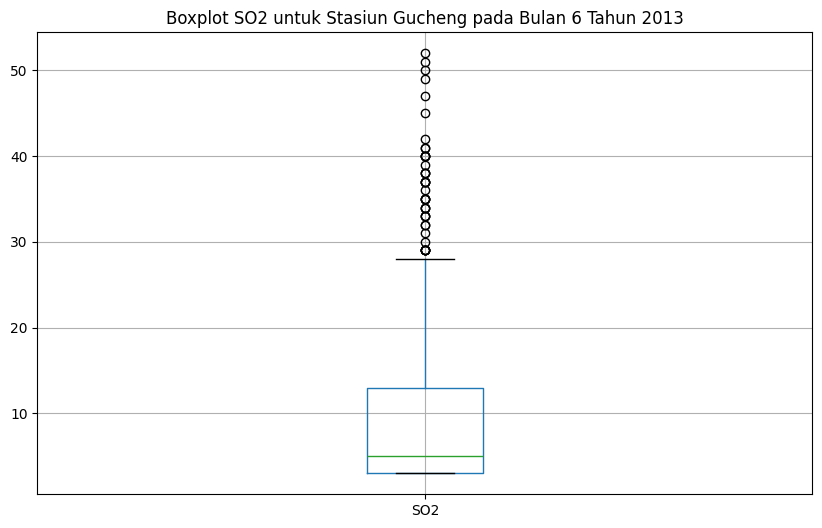

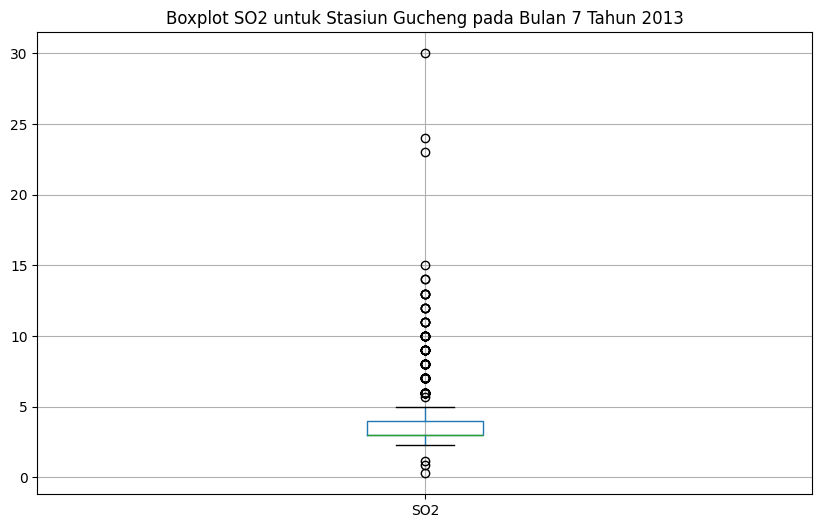

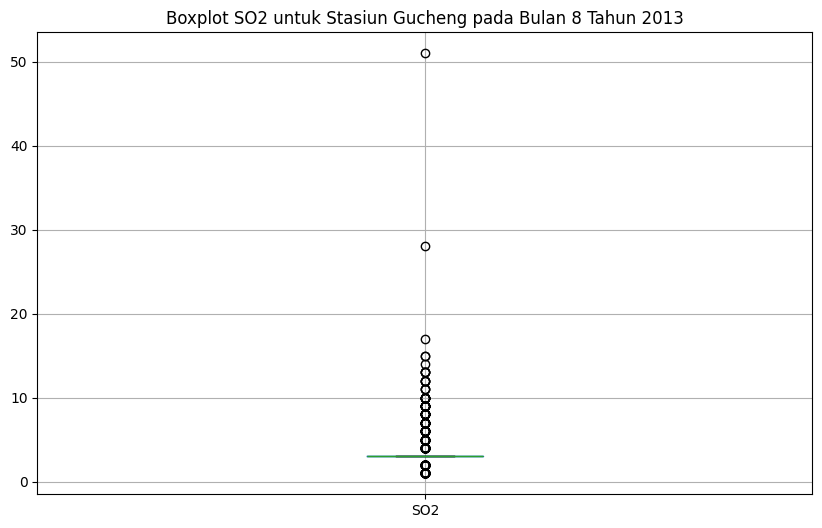

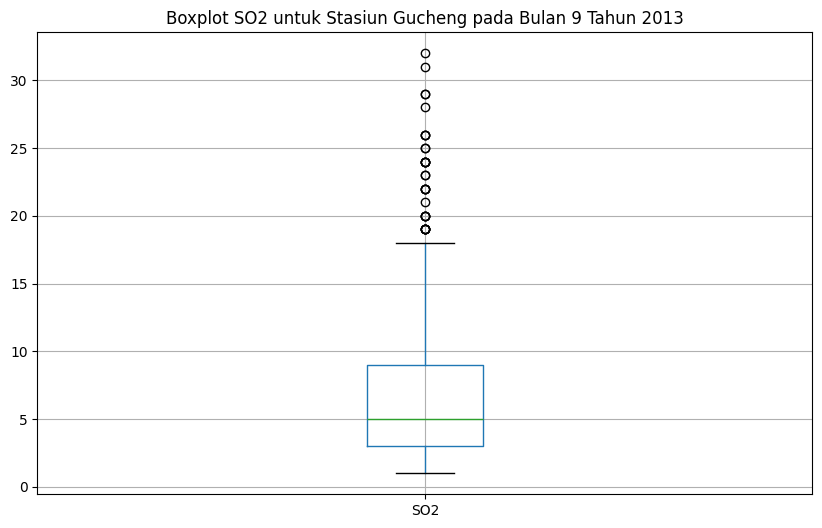

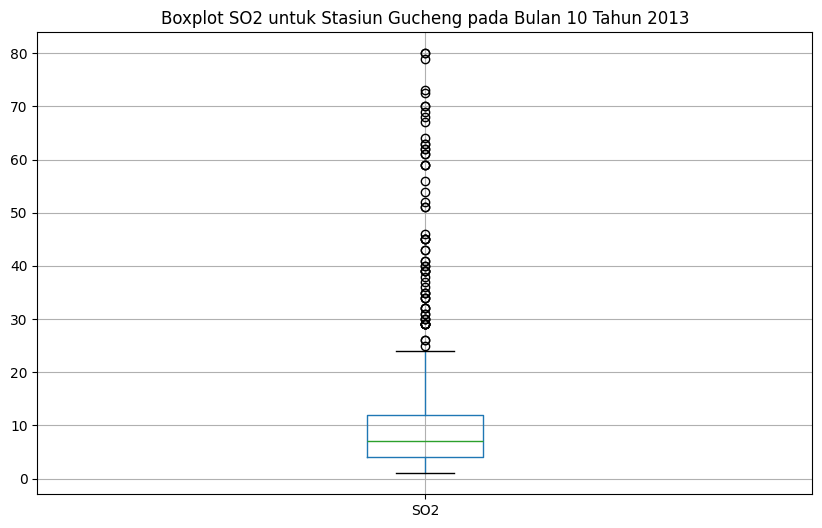

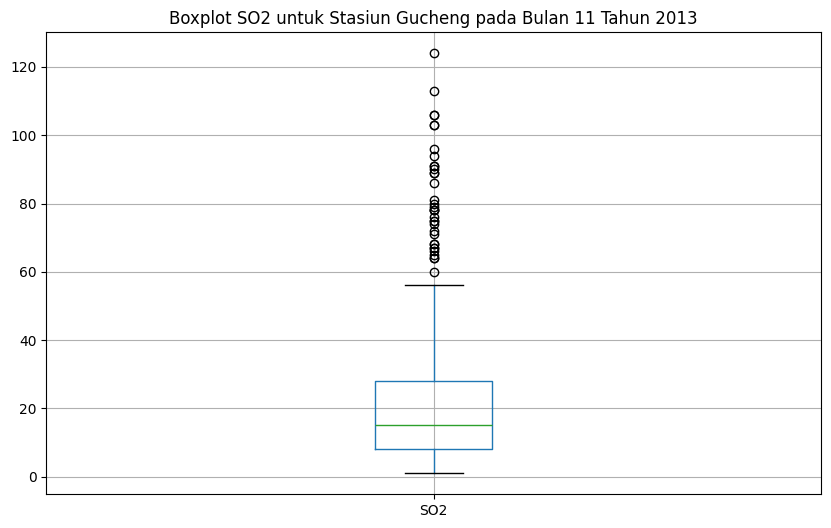

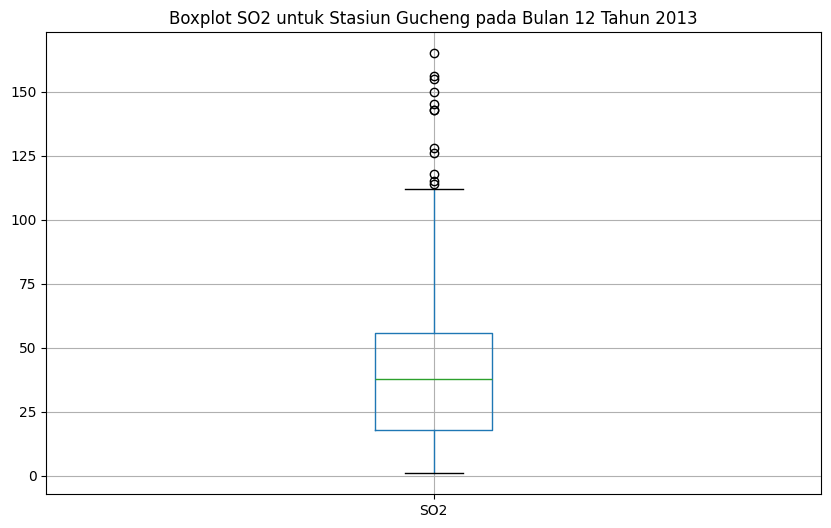

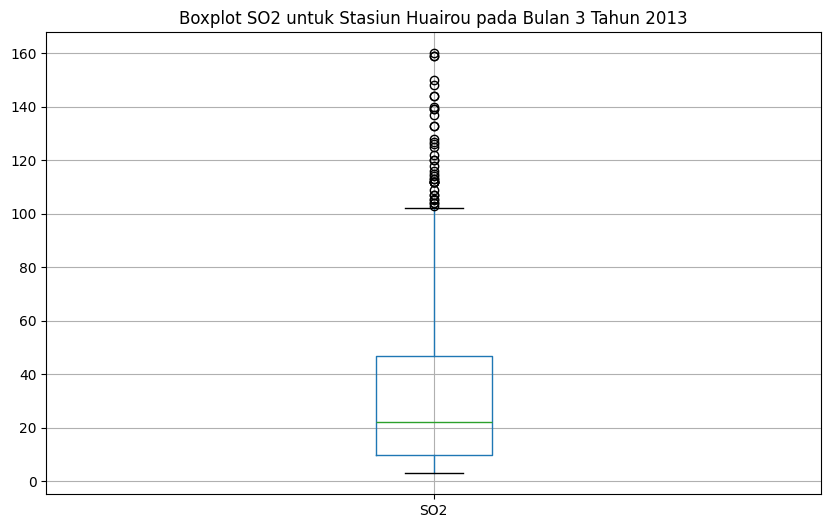

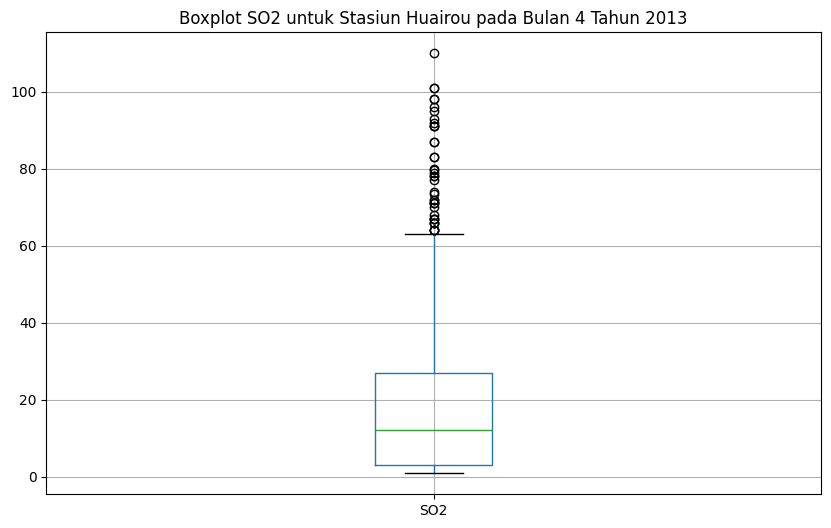

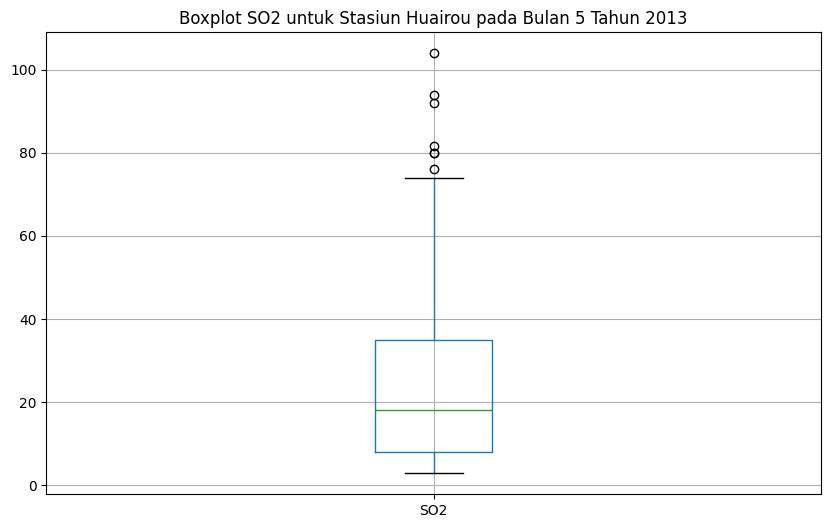

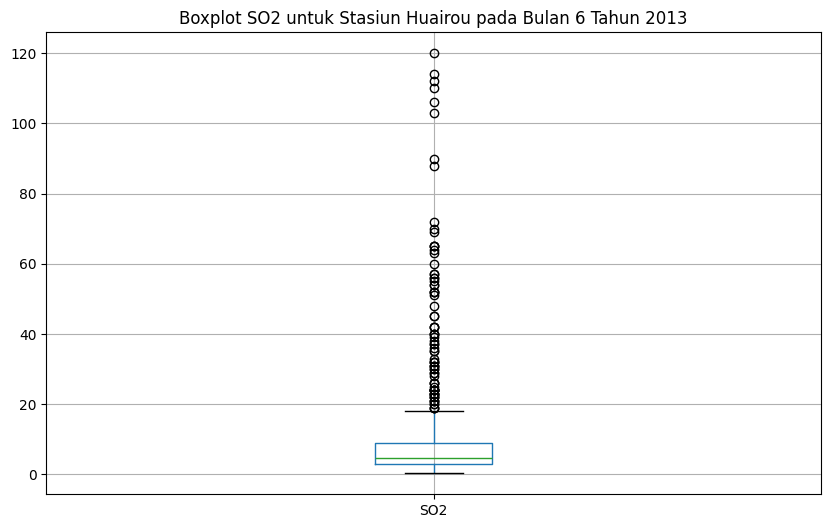

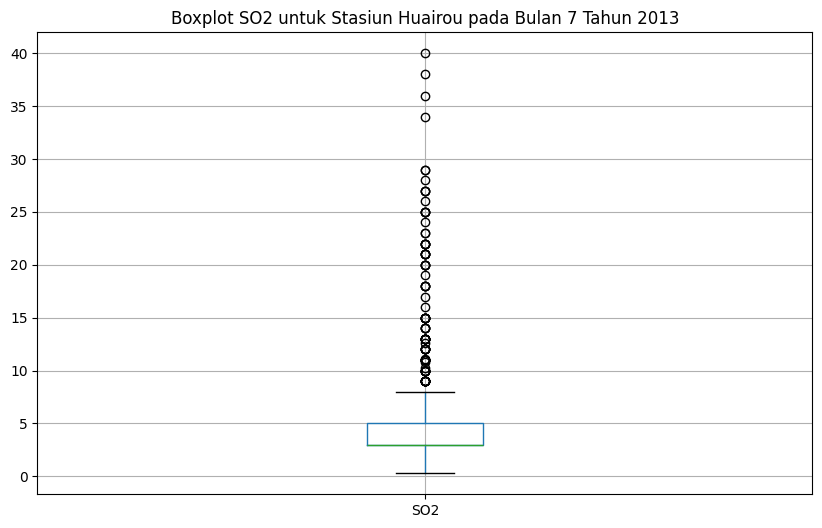

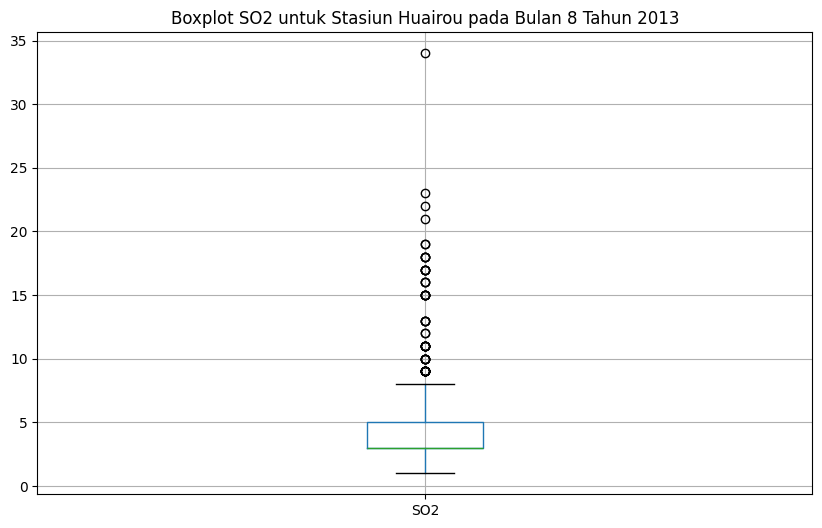

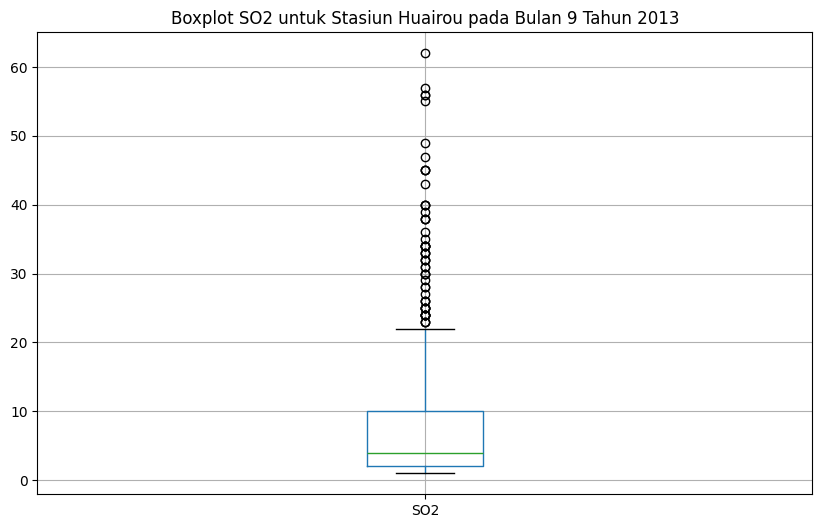

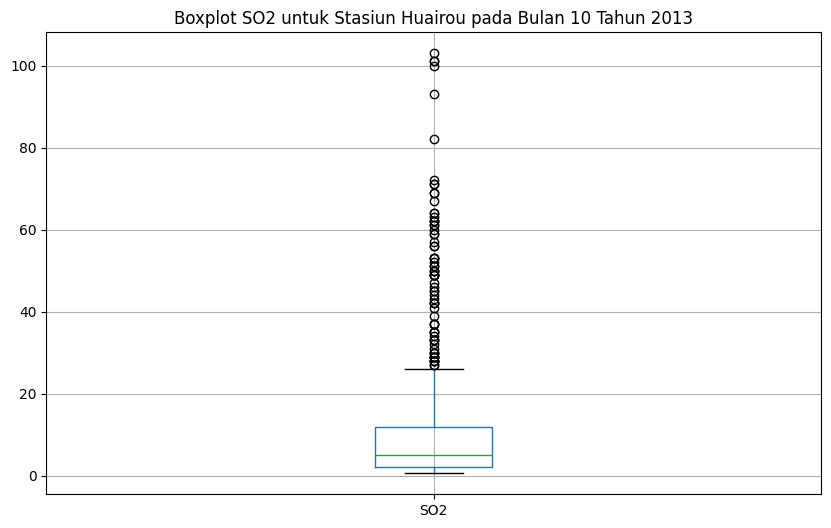

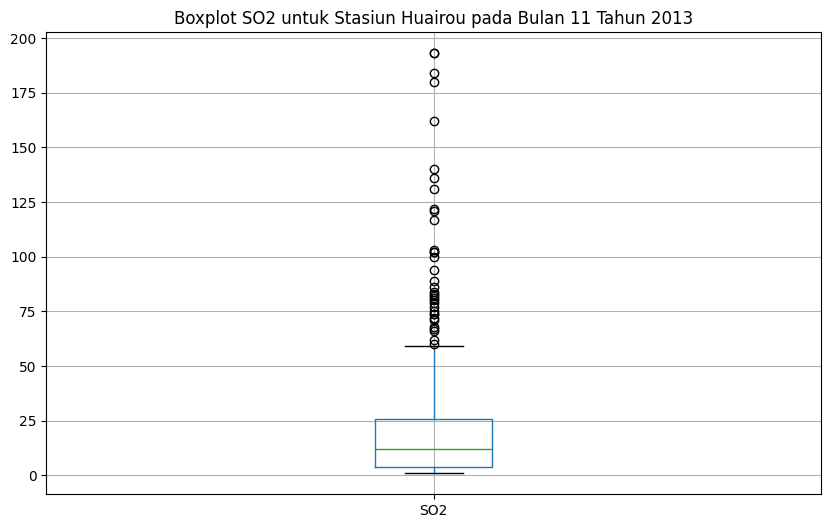

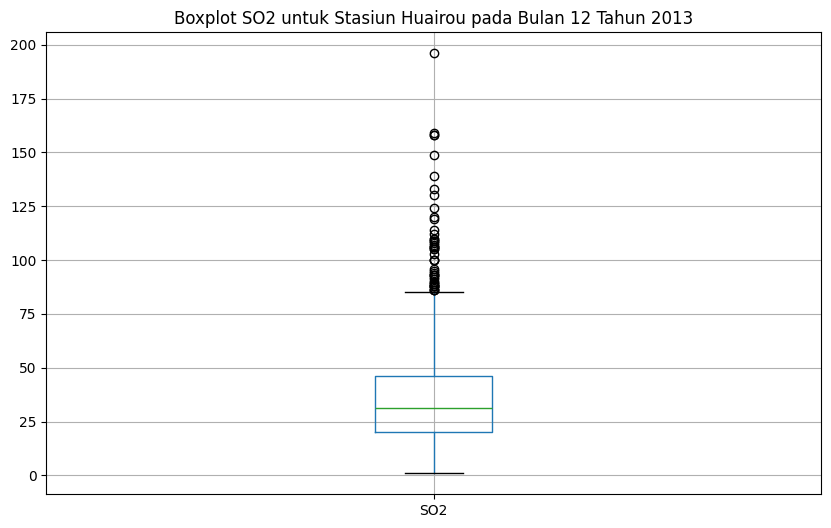

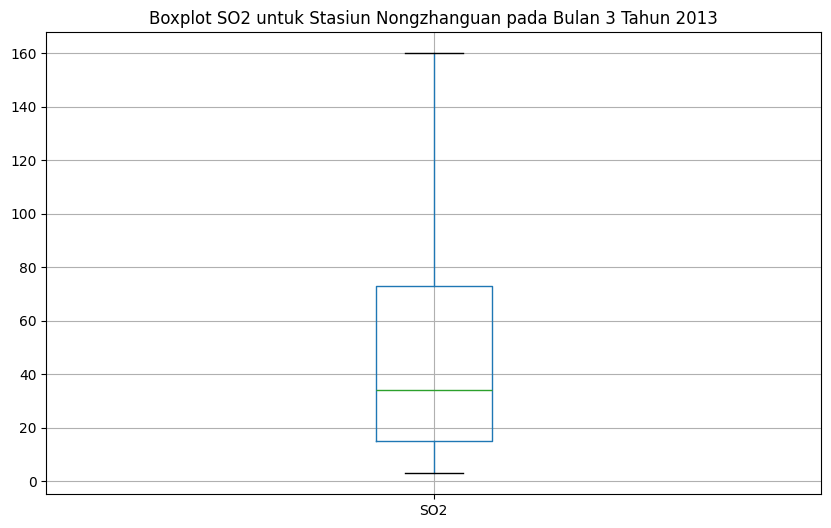

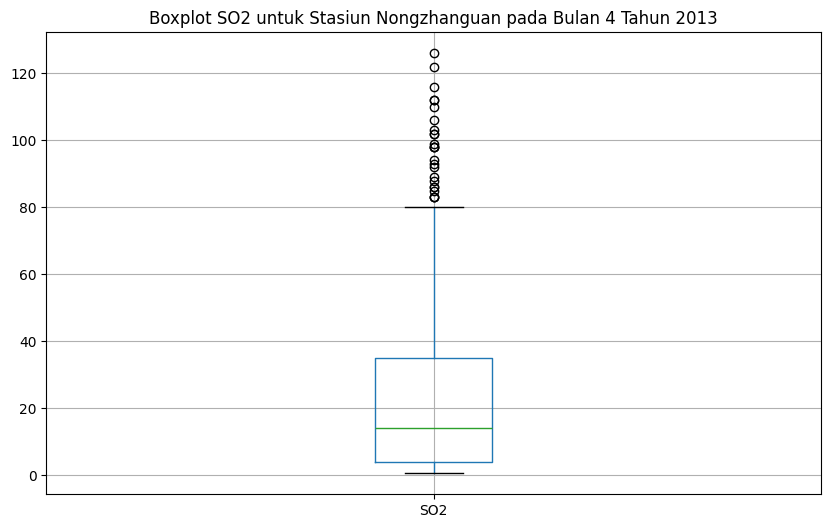

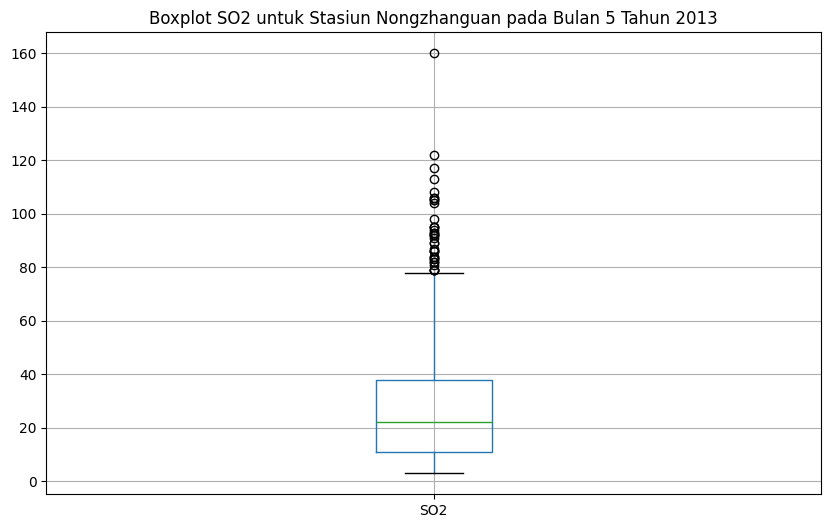

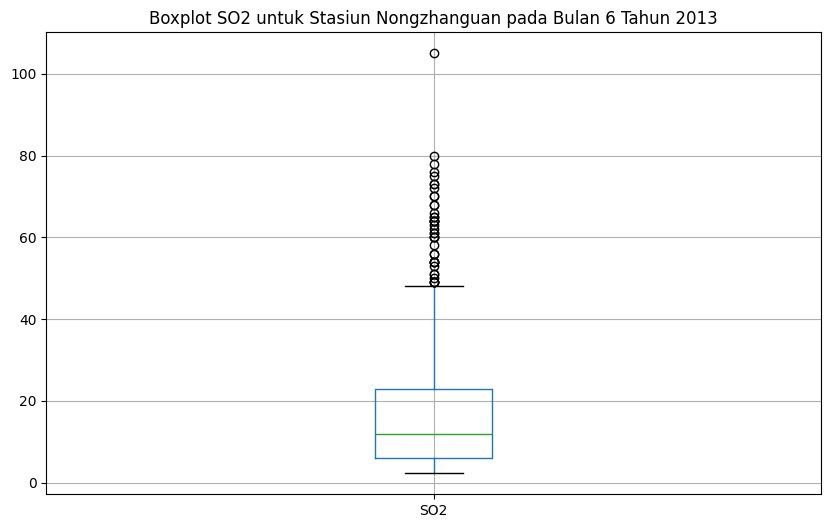

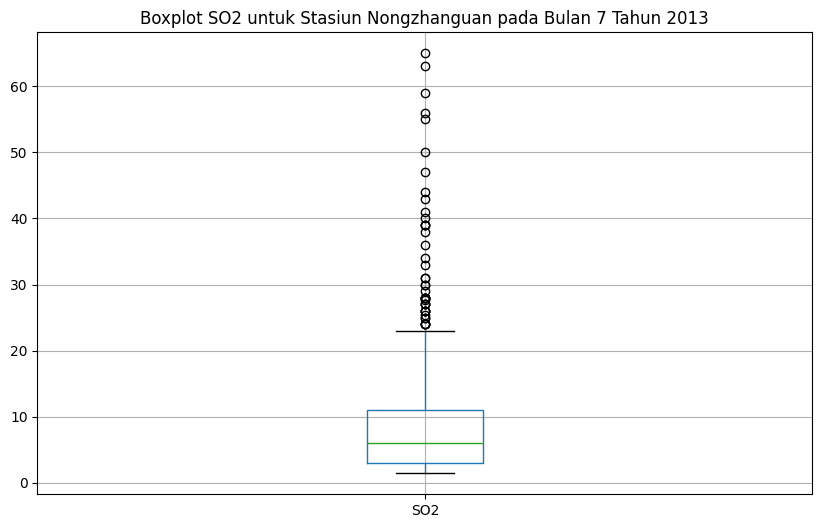

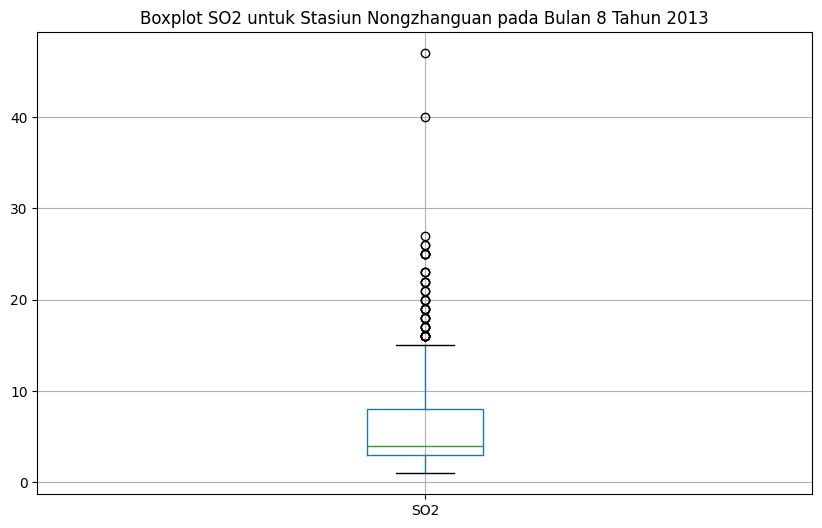

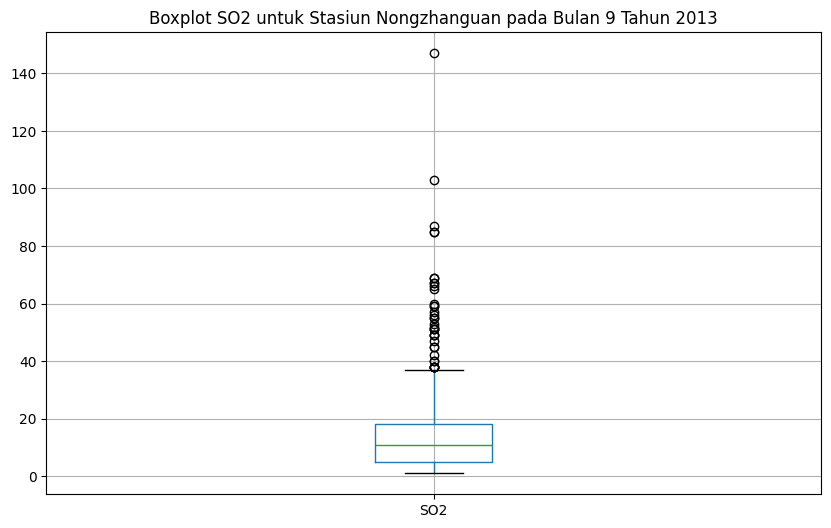

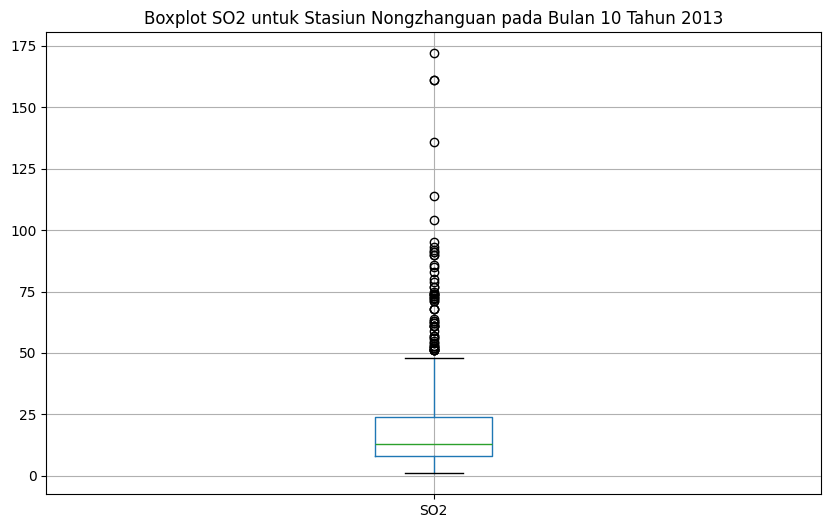

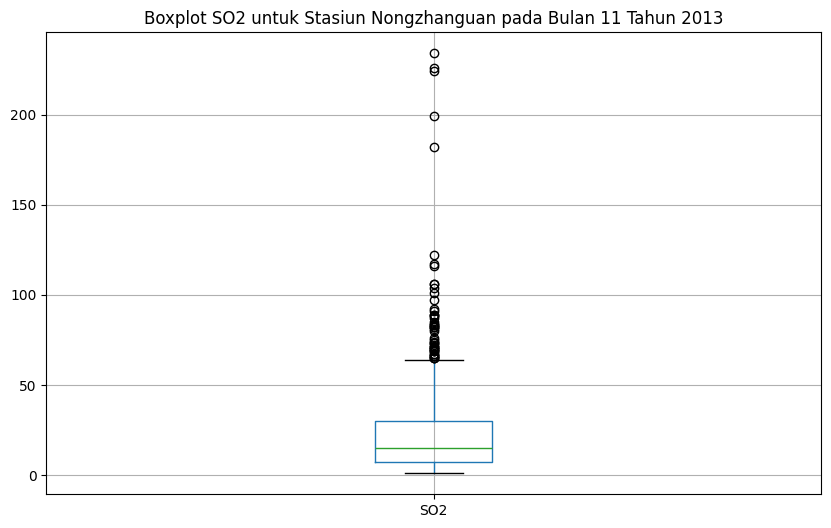

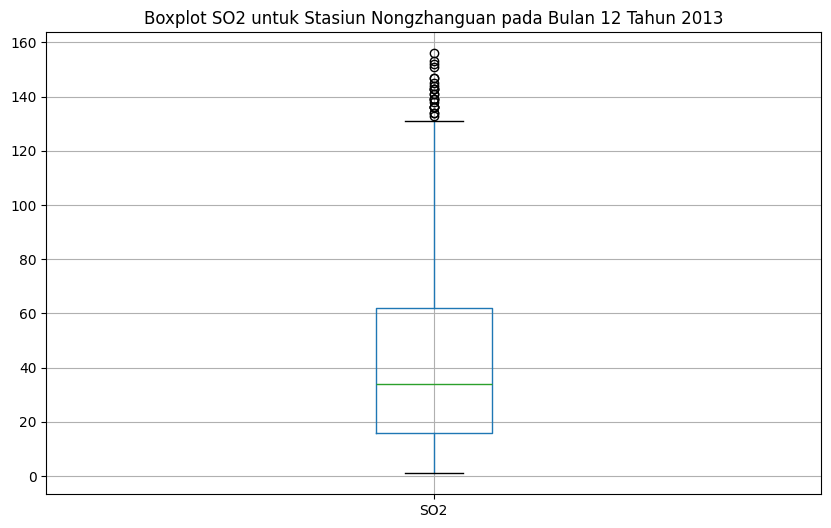

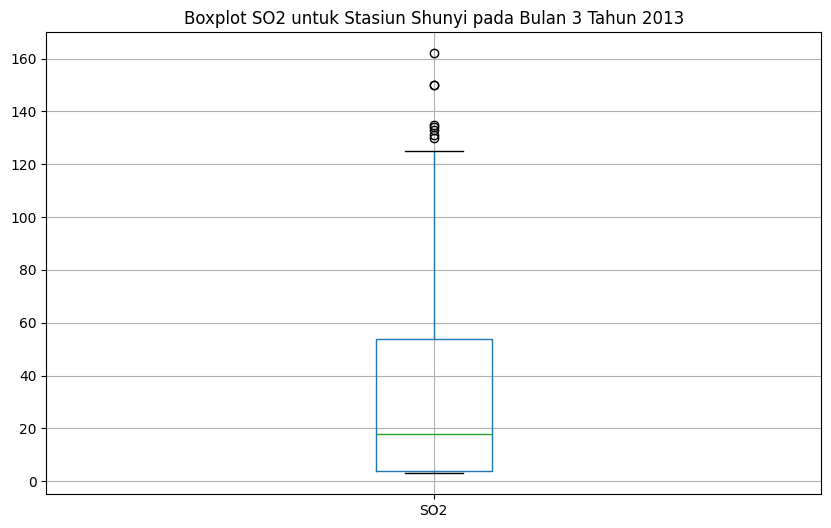

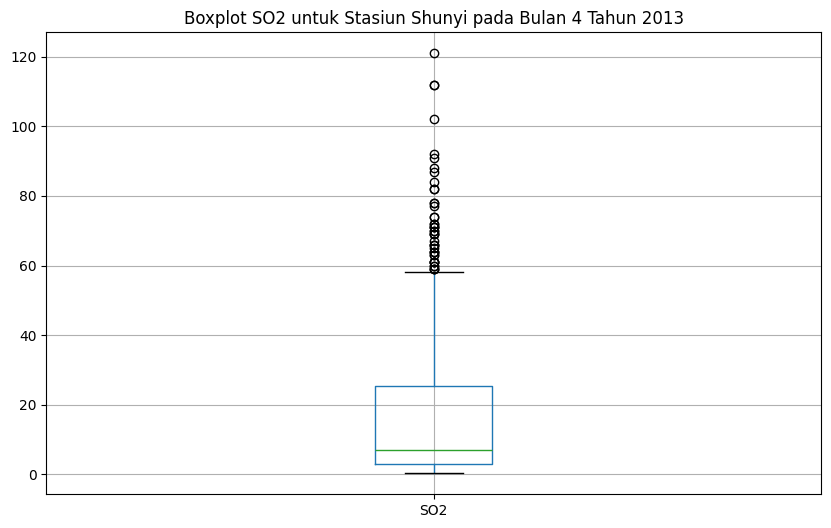

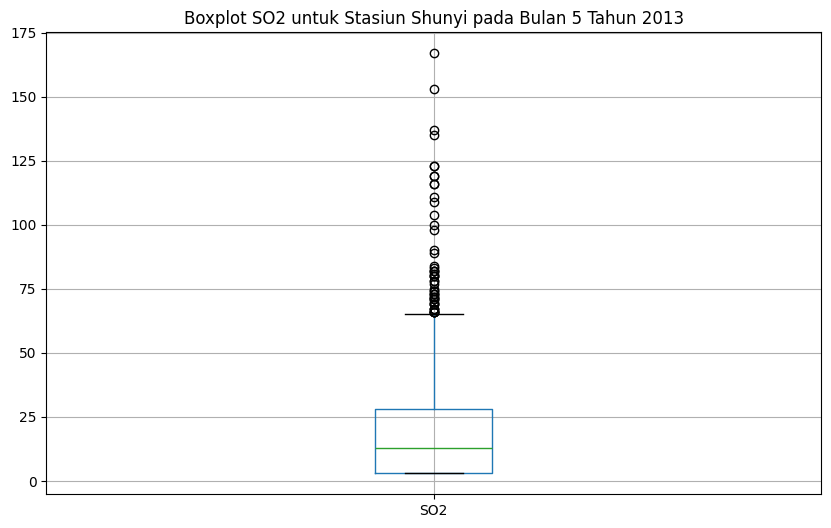

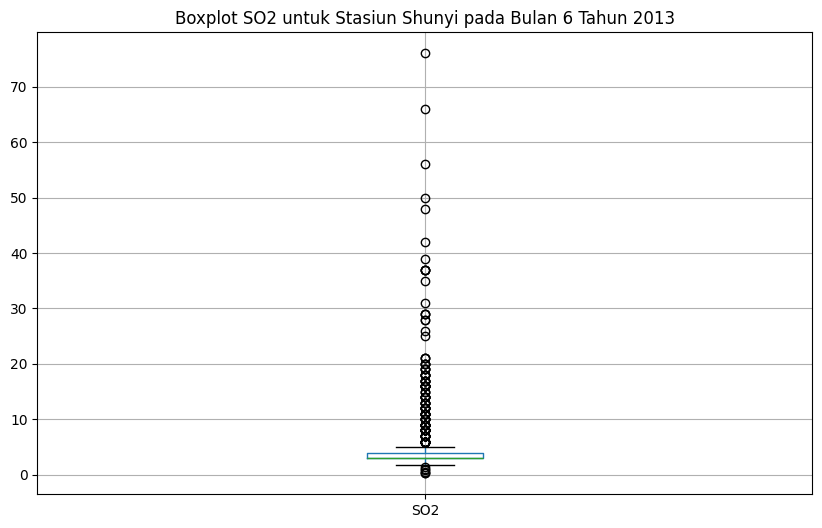

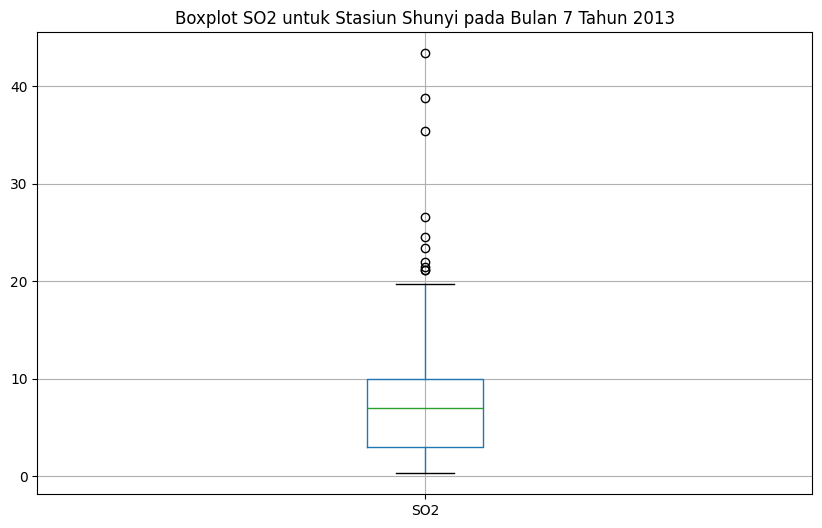

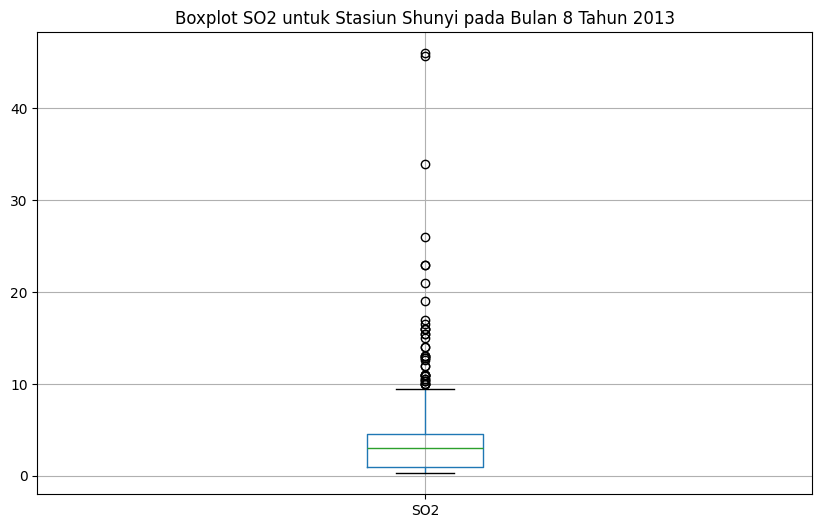

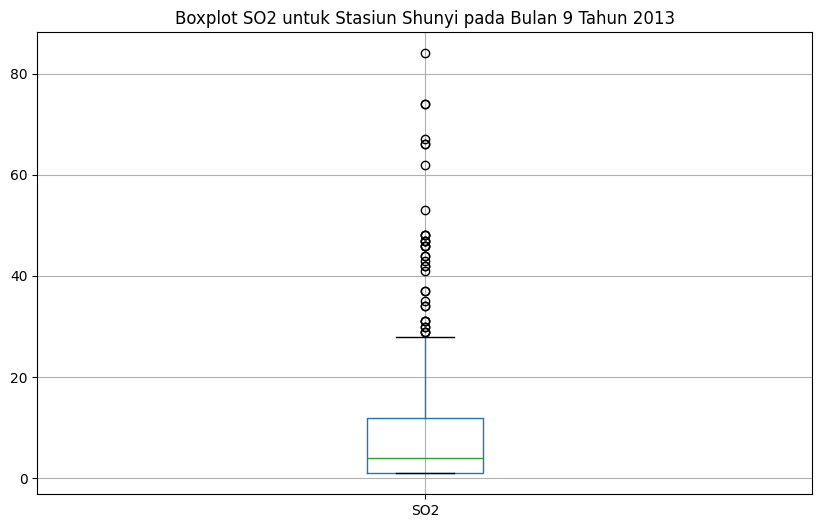

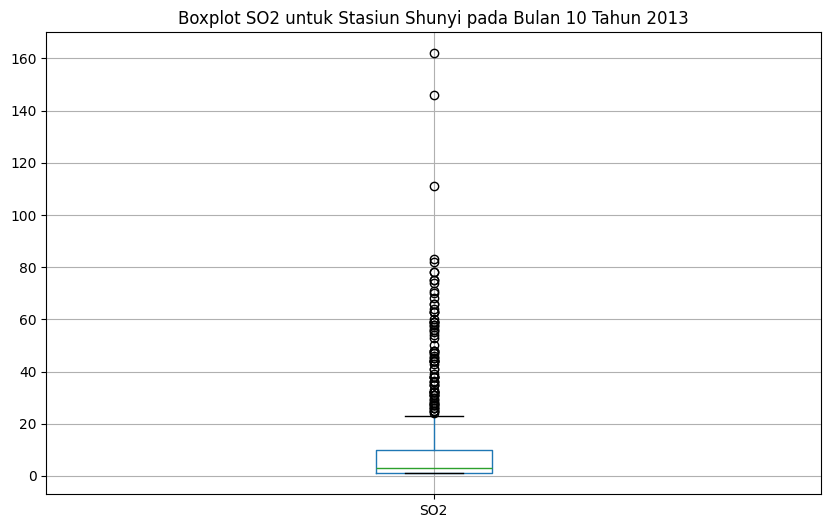

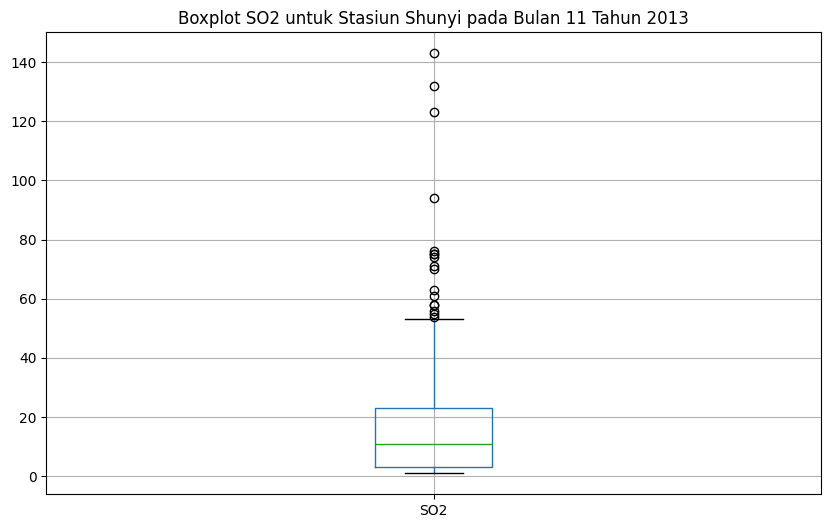

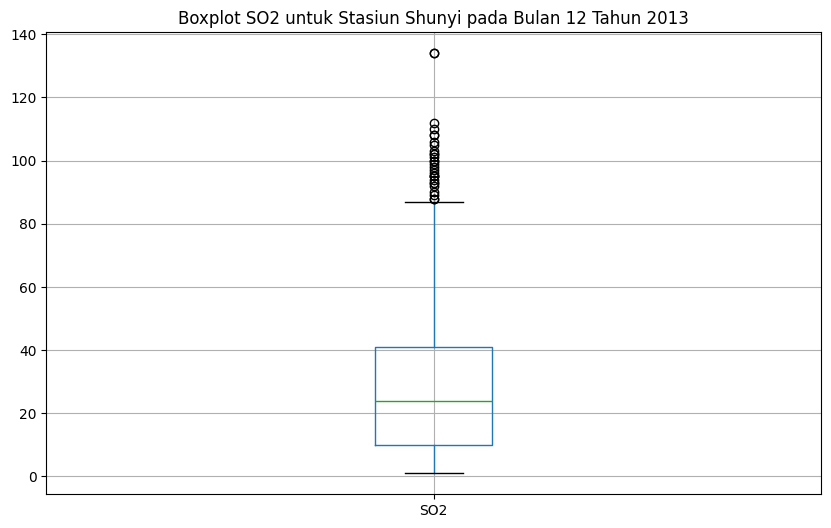

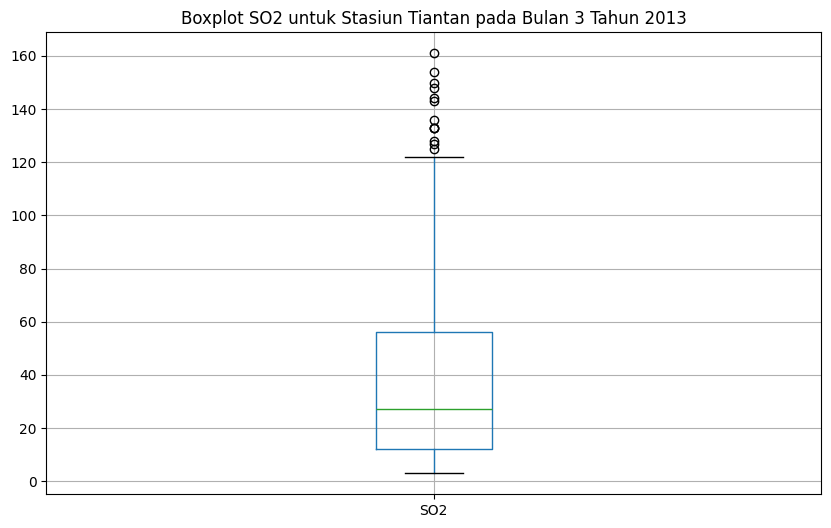

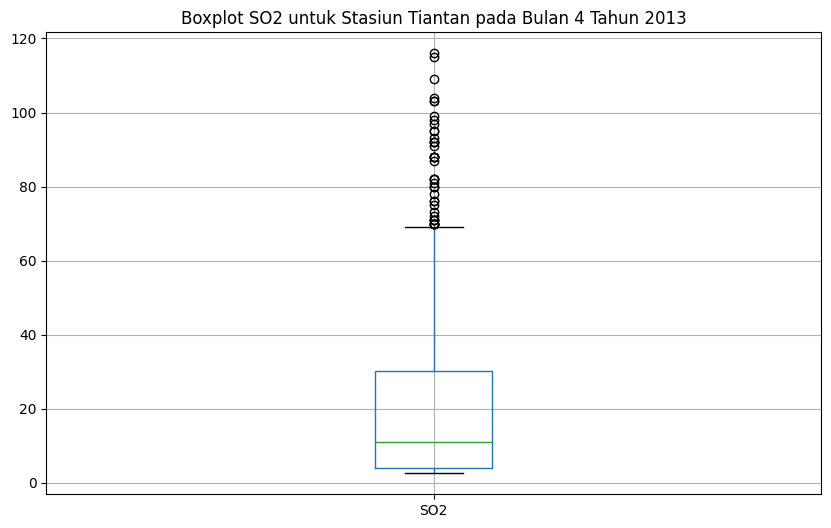

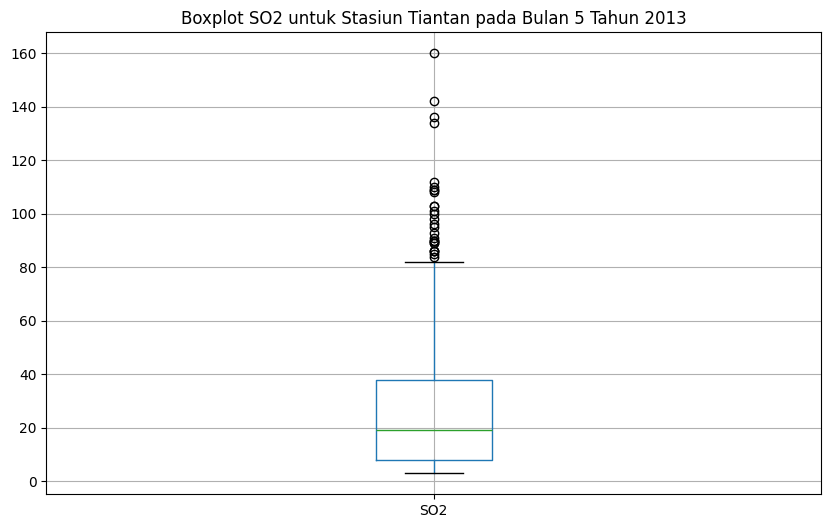

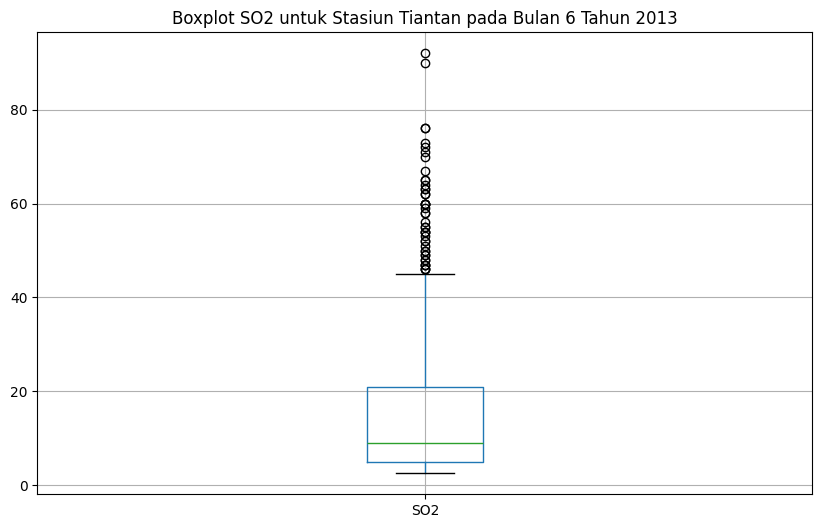

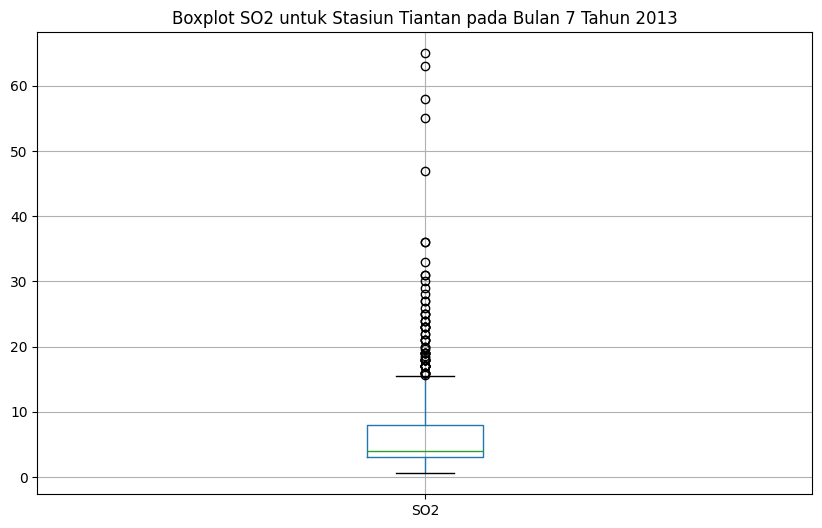

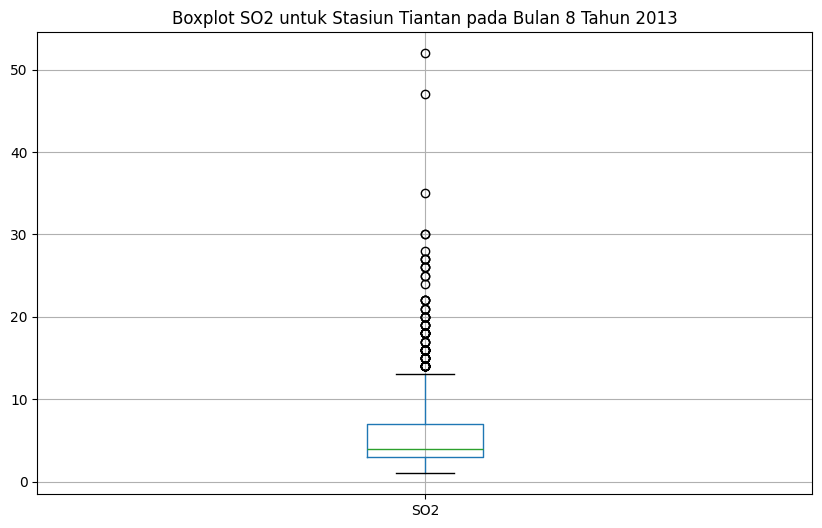

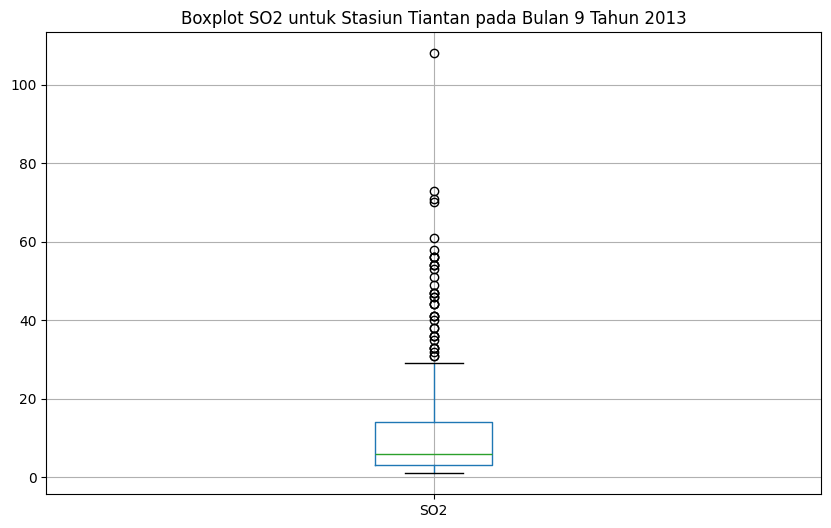

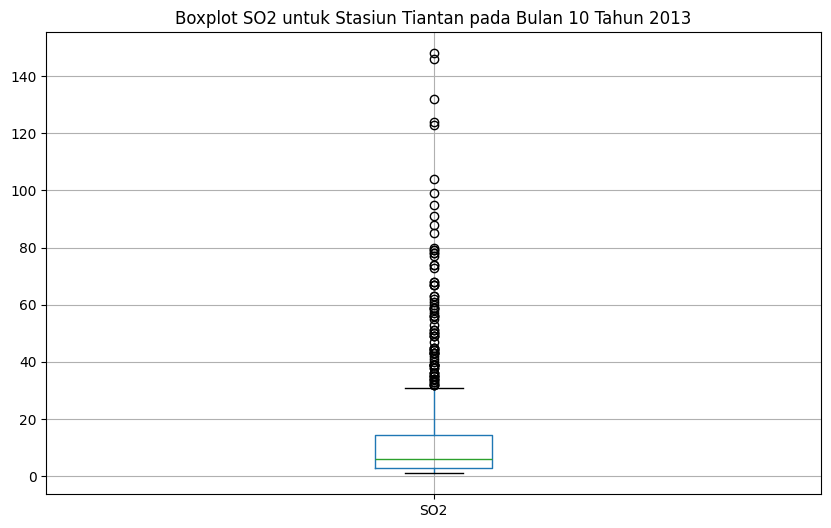

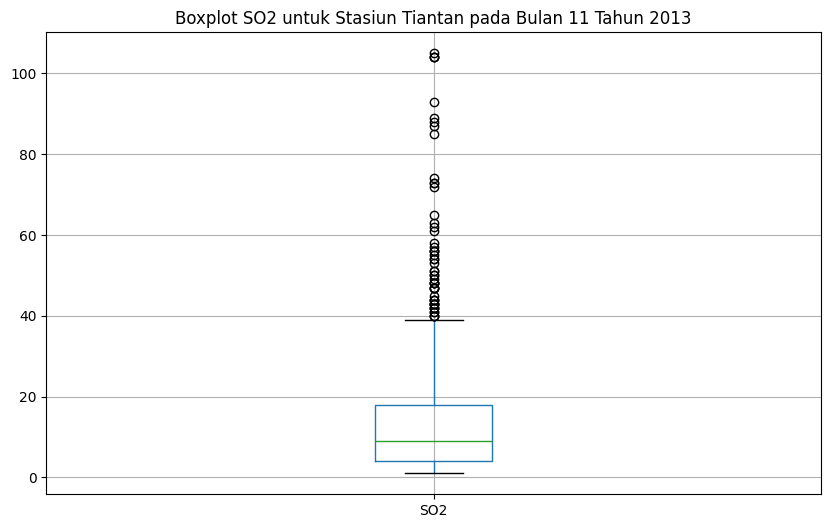

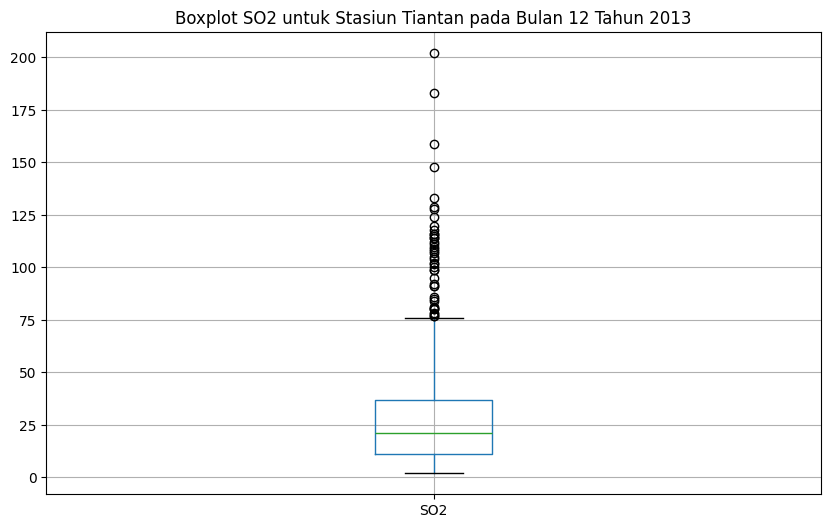

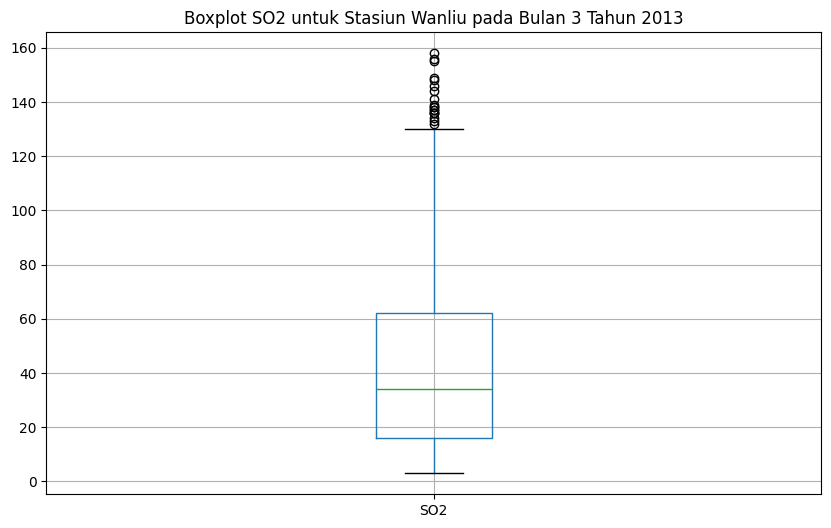

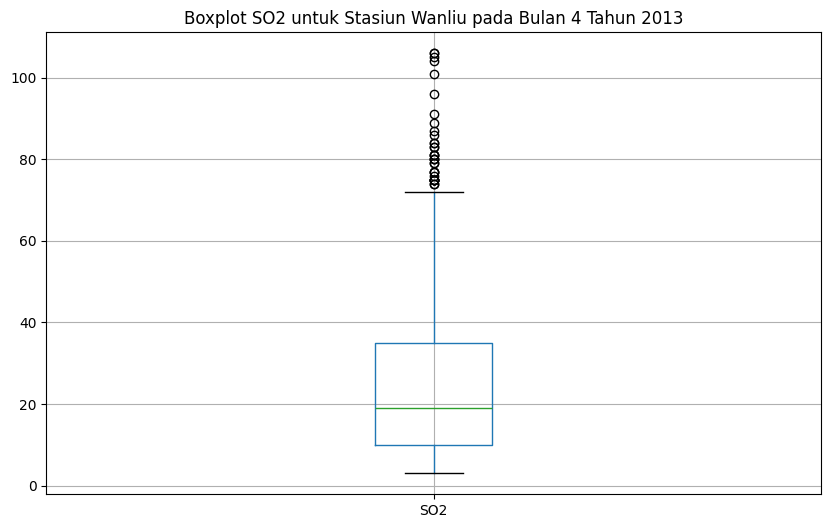

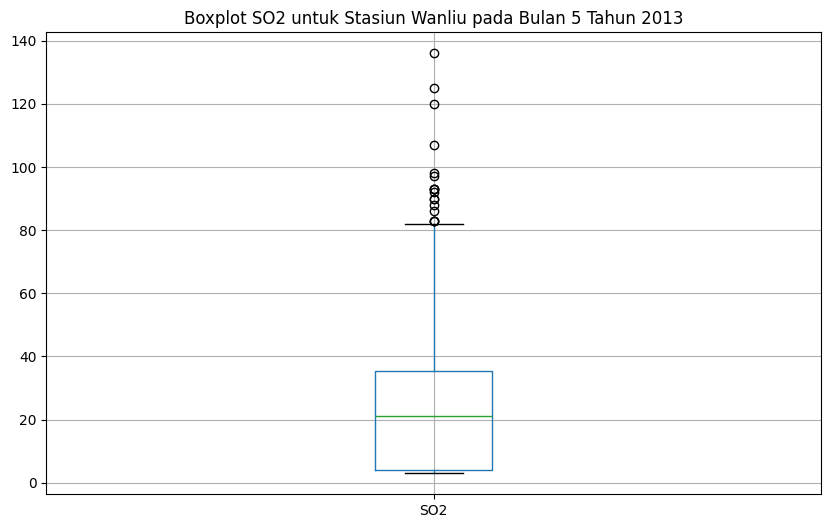

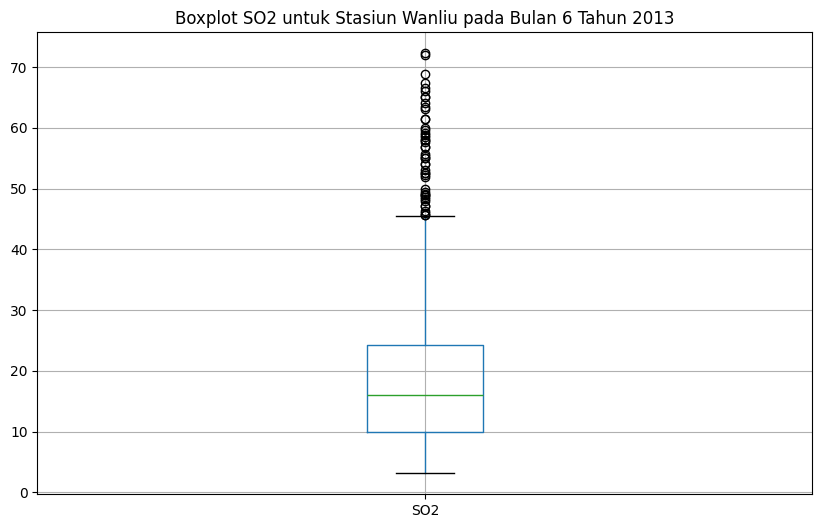

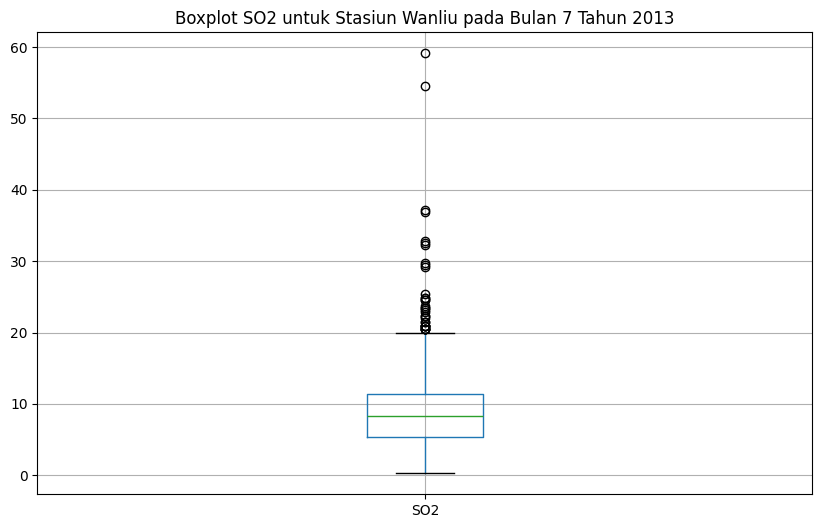

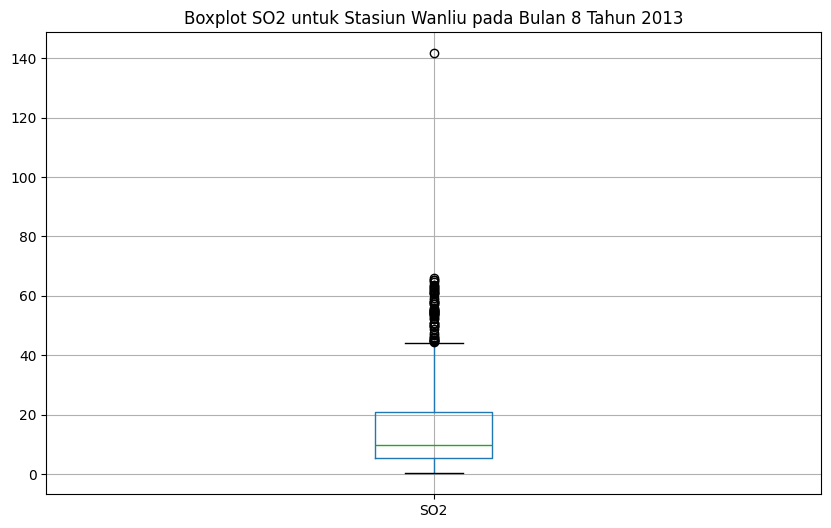

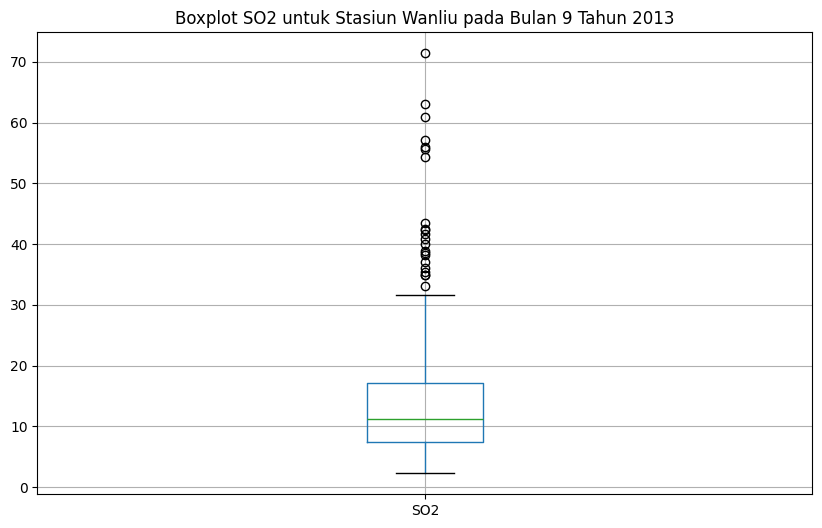

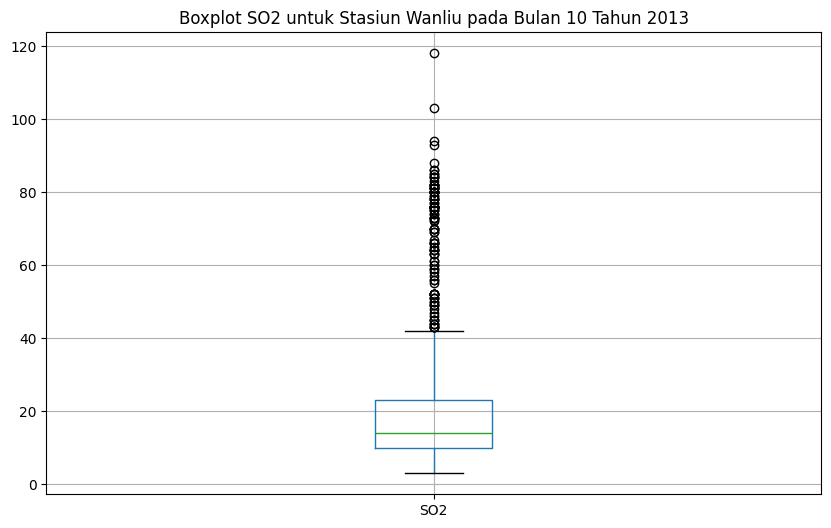

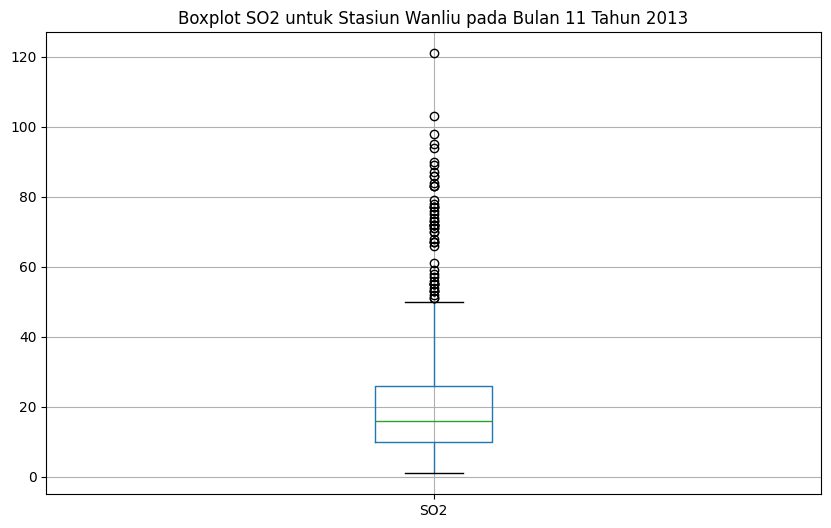

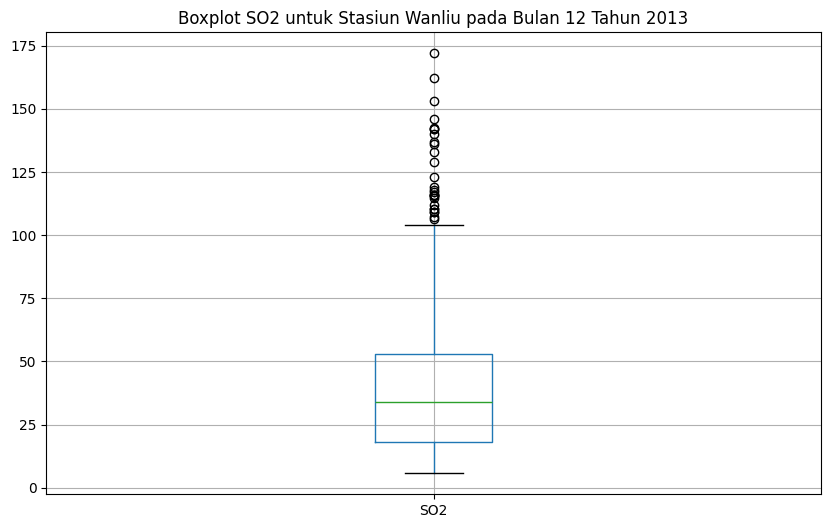

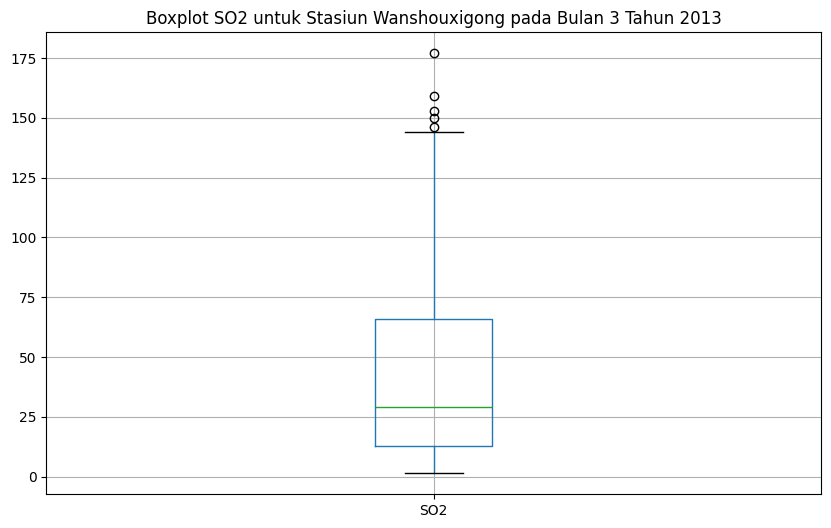

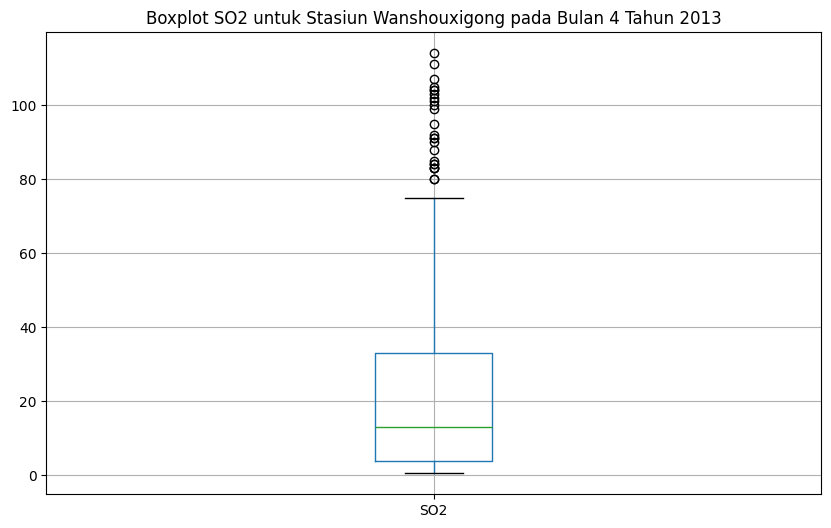

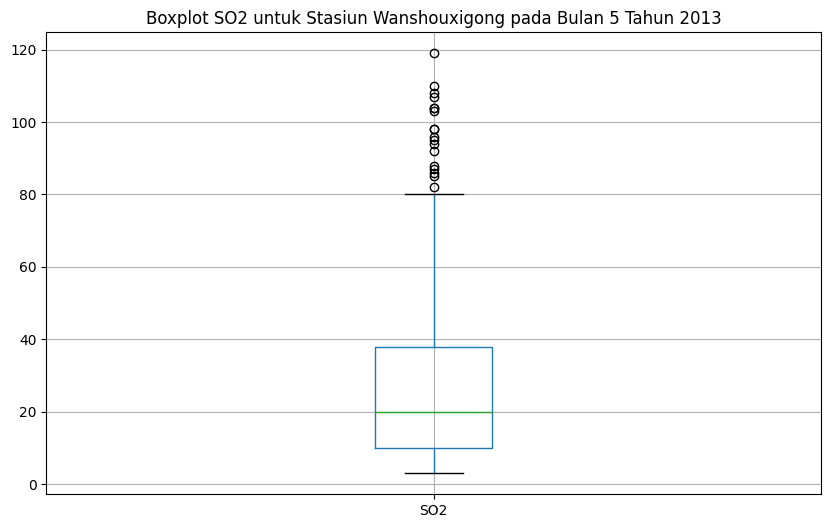

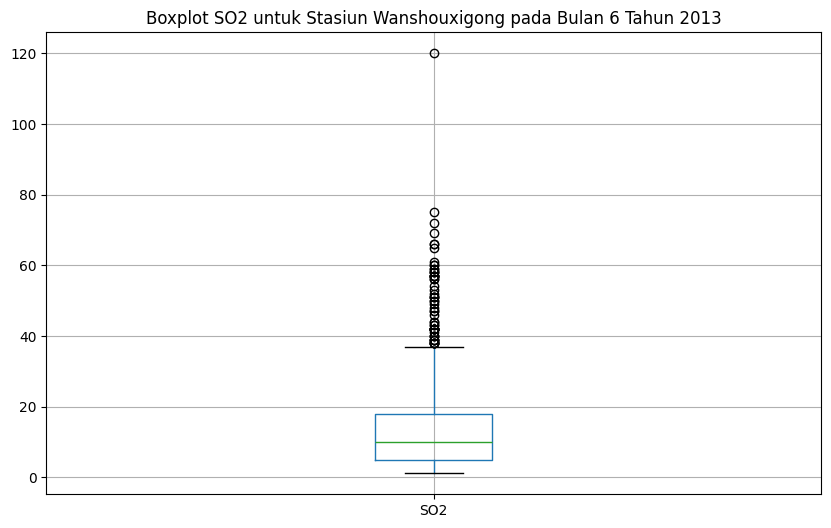

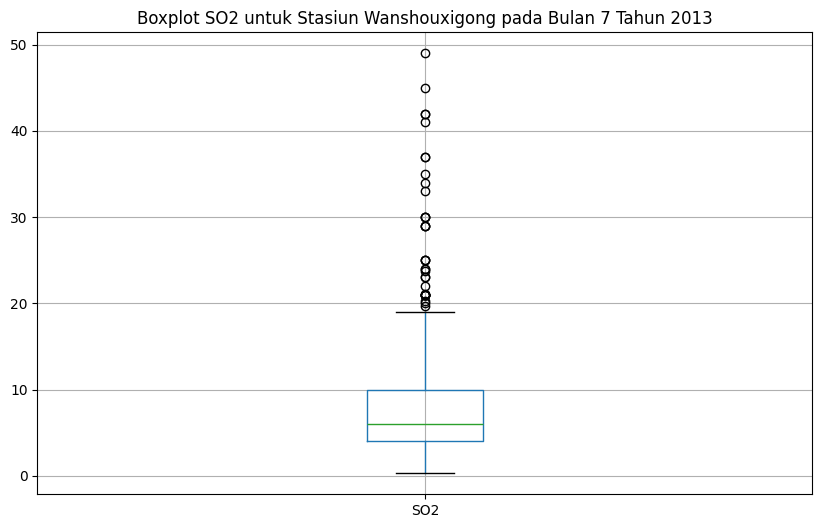

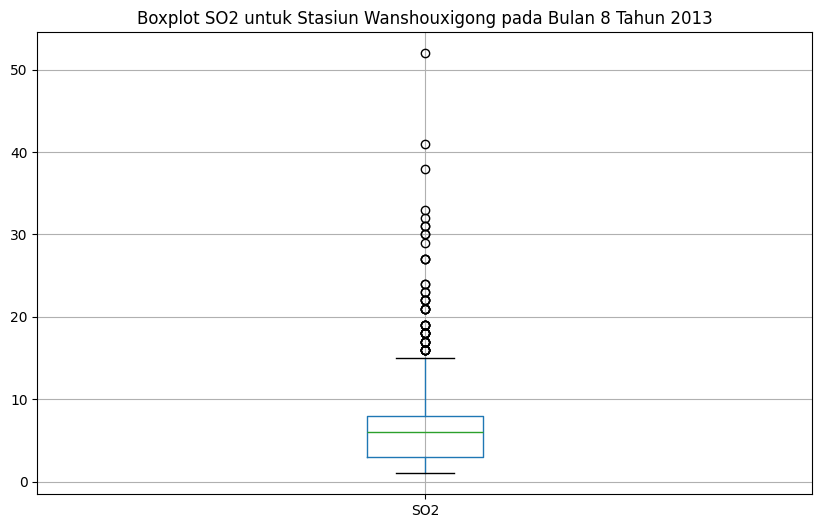

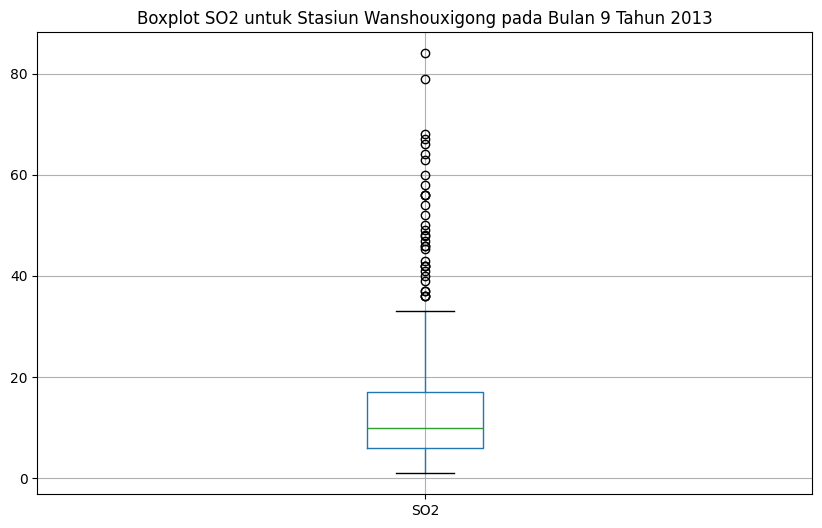

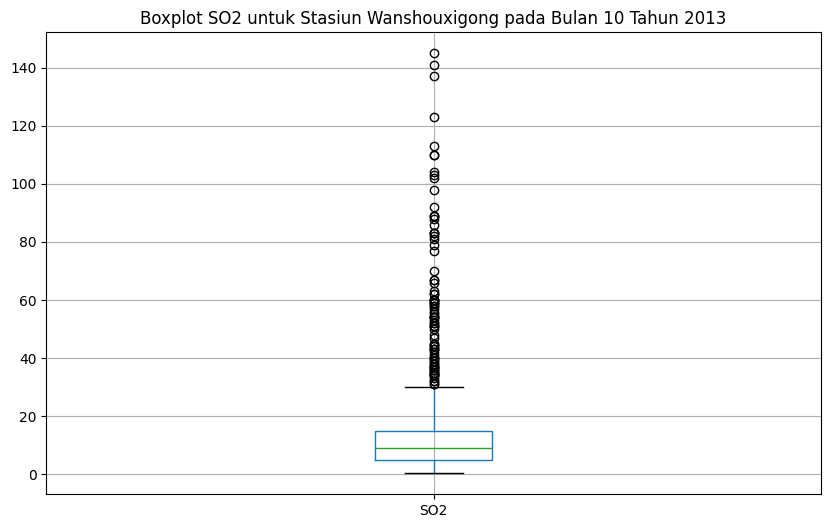

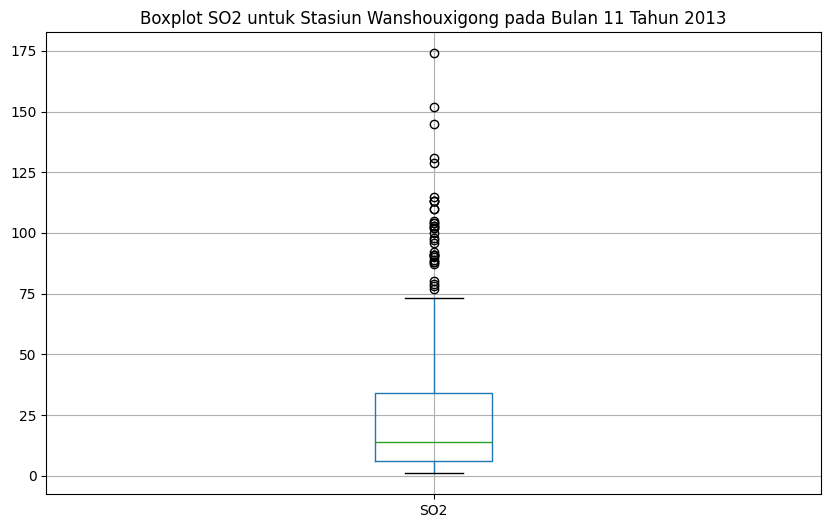

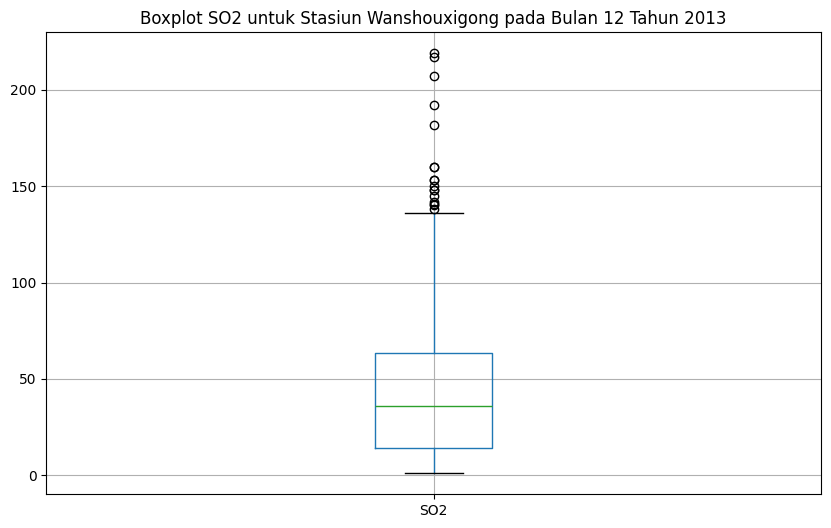

In [55]:
import pandas as pd
import matplotlib.pyplot as plt


# Pertama, dapatkan semua nilai unik dari kolom 'station'
unique_stations = data_clean['station'].unique()

# Loop melalui setiap stasiun unik
for station in unique_stations:
    # Loop melalui setiap bulan dari 1 sampai 12
    for month in range(3, 13):
        # Filter DataFrame untuk hanya mencakup baris di mana kolom 'year' adalah 2013, kolom 'month' adalah bulan saat ini, dan kolom 'station' adalah stasiun saat ini
        data_filtered = data_clean.loc[(data_clean['year'] == 2013) & (data_clean['month'] == month) & (data_clean['station'] == station)]
        
        # Buat boxplot untuk kolom 'SO2' untuk tahun 2013 di bulan saat ini di stasiun saat ini
        plt.figure(figsize=(10, 6)) # Mengatur ukuran plot
        data_filtered.boxplot(column='SO2')
        plt.title(f'Boxplot SO2 untuk Stasiun {station} pada Bulan {month} Tahun 2013')
        plt.show()



Dapat diliat pada visualisasi diatas banyak terdapat outlier pada column SO2 di setiap station

C:\Users\tmali\AppData\Local\Temp\ipykernel_17552\1082761678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['datetime'] = pd.to_datetime(data_clean[['year', 'month', 'day', 'hour']])
C:\Users\tmali\AppData\Local\Temp\ipykernel_17552\1082761678.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_TEMP = data_clean['TEMP'].resample('M').mean()
C:\Users\tmali\AppData\Local\Temp\ipykernel_17552\1082761678.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_O3 = data_clean['O3'].resample('M').mean()


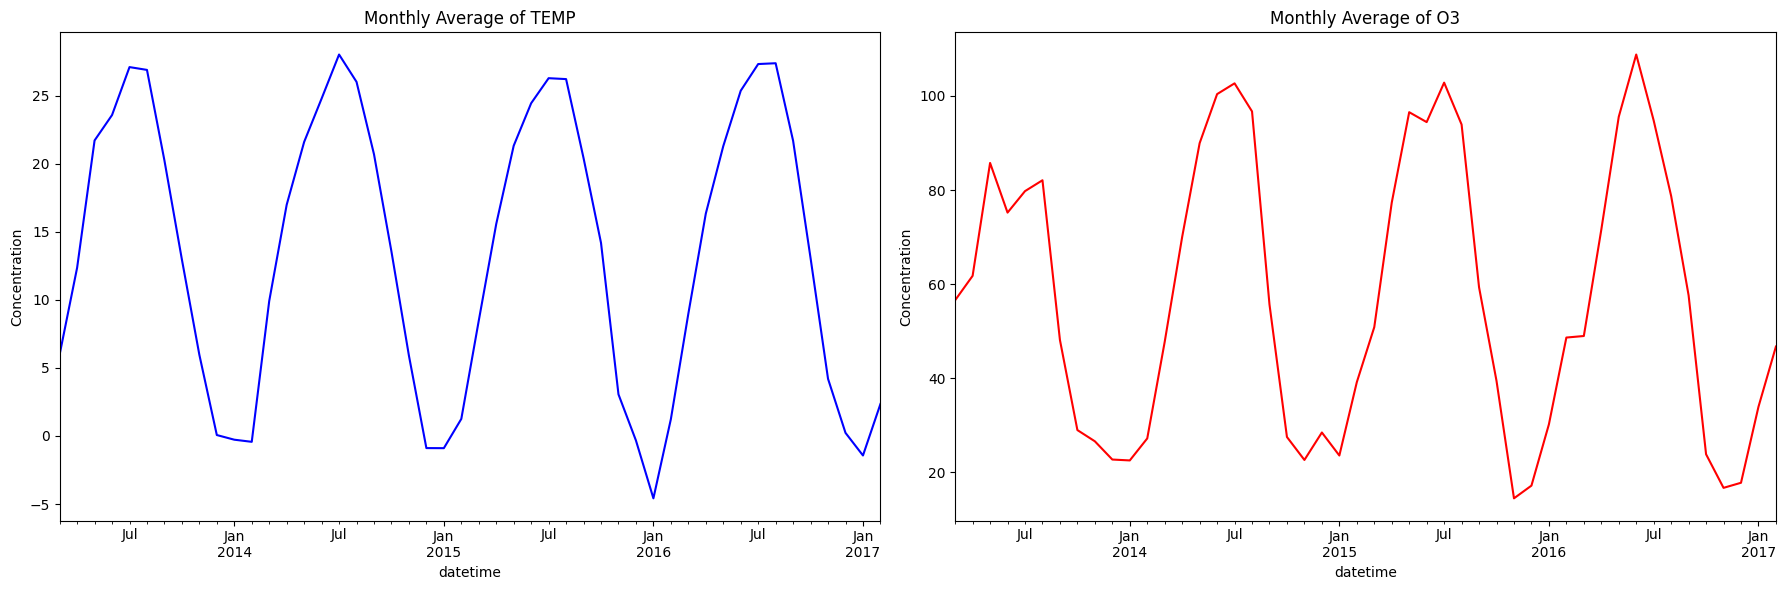

In [56]:


# Membuat indeks datetime dari kolom year, month, day, dan hour
data_clean['datetime'] = pd.to_datetime(data_clean[['year', 'month', 'day', 'hour']])

# Mengatur datetime sebagai indeks
data_clean.set_index('datetime', inplace=True)

# Menghitung rata-rata bulanan untuk TEMP dan O3
monthly_avg_TEMP = data_clean['TEMP'].resample('M').mean()
monthly_avg_O3 = data_clean['O3'].resample('M').mean()

# Plot time series untuk rata-rata bulanan TEMP dan O3
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
monthly_avg_TEMP.plot(title='Monthly Average of TEMP', color='blue')
plt.ylabel('Concentration')

plt.subplot(1, 2, 2)
monthly_avg_O3.plot(title='Monthly Average of O3', color='red')
plt.ylabel('Concentration')

plt.tight_layout()
plt.show()


In [57]:
# Nama kolom yang ingin dianalisis
column_name = 'TEMP'

# Menghitung statistik deskriptif untuk kolom 'TEMP'
statistic = data_clean[column_name].describe(include="all")

# Menampilkan hasil statistik deskriptif
statistic

count    415799.000000
mean         13.530255
std          11.432510
min         -19.900000
25%           3.100000
50%          14.500000
75%          23.200000
max          41.600000
Name: TEMP, dtype: float64

In [58]:
# Nama kolom yang ingin dianalisis
column_name = 'O3'

# Menghitung statistik deskriptif untuk kolom 'O3'
statistic = data_clean[column_name].describe(include="all")

# Menampilkan hasil statistik deskriptif
statistic

count    407491.000000
mean         57.372271
std          56.661607
min           0.214200
25%          11.000000
50%          45.000000
75%          82.000000
max        1071.000000
Name: O3, dtype: float64

In [59]:
# Nama kolom yang ingin dianalisis
column_name = 'SO2'

# Menghitung statistik deskriptif untuk kolom 'SO2'
station_stats = data_clean.groupby('station')[column_name].describe()

# Menampilkan hasil statistik deskriptif
print(station_stats)


                 count       mean        std     min  25%   50%   75%    max
station                                                                     
Aotizhongxin   34129.0  17.375901  22.823017  0.2856  3.0   9.0  21.0  341.0
Changping      34436.0  14.958906  20.975331  0.2856  2.0   7.0  18.0  310.0
Dingling       34334.0  11.749650  15.519259  0.2856  2.0   5.0  15.0  156.0
Dongsi         34401.0  18.531107  22.905655  0.2856  4.0  10.0  24.0  300.0
Guanyuan       34590.0  17.590941  23.600367  1.0000  3.0   8.0  22.0  293.0
Gucheng        34557.0  15.366162  21.204526  0.2856  2.0   7.0  20.0  500.0
Huairou        34084.0  12.121553  18.896912  0.2856  2.0   4.0  14.0  315.0
Nongzhanguan   34618.0  18.689242  24.280665  0.5712  3.0   9.0  23.0  257.0
Shunyi         33768.0  13.572039  19.572068  0.2856  2.0   5.0  17.0  239.0
Tiantan        33946.0  14.367615  20.144631  0.5712  3.0   7.0  17.0  273.0
Wanliu         34489.0  18.376481  22.609648  0.2856  4.0  10.0  23.0  282.0

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana penyebaran SO2 untuk stasiun tertentu untuk tahun 2013?

In [5]:

data_clean = pd.read_csv('clean_data.csv')
# Create a datetime column from year, month, and day
data_clean['Date'] = pd.to_datetime(data_clean[['year', 'month', 'day']])

# Filter data for one specific year (e.g., 2013)
year = 2013
clean_data_year = data_clean[data_clean['Date'].dt.year == year]

# Get unique station names
stations = clean_data_year['station'].unique()

# Loop over each station
for station in stations:
    # Filter data for the current station
    clean_data_station = clean_data_year[clean_data_year['station'] == station]

    # Calculate mean for hours
    clean_data_station = clean_data_station.groupby(['Date', 'day']).agg({'hour': 'mean', 'SO2': 'mean'}).reset_index()

    # Categorizing SO2 values
    def categorize_SO2(value):
        if value < 100:
            return 'Good'
        elif 100 <= value < 200:
            return 'Fair'
        elif 200 <= value < 300:
            return 'Moderate'
        elif 300 <= value < 600:
            return 'Unhealthy'
        else:
            return 'Hazardous'

    # Apply categorization to create a new column
    clean_data_station['SO2_Category'] = clean_data_station['SO2'].apply(categorize_SO2)

    # Group by month and SO2 category and calculate count
    grouped_data = clean_data_station.groupby([clean_data_station['Date'].dt.month, 'SO2_Category']).size().unstack(fill_value=0).reset_index()

    # Rename month numbers to month names for better readability
    month_names = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
    grouped_data['Date'] = grouped_data['Date'].map(month_names)

    # Reindex to ensure all categories are present for each month
    grouped_data.set_index(['Date'], inplace=True)
    grouped_data = grouped_data.reindex(columns=['Good', 'Fair', 'Moderate', 'Unhealthy', 'Hazardous'], fill_value=0).reset_index()

    # Melt the dataframe to long format
    grouped_data_melted = pd.melt(grouped_data, id_vars=['Date'], value_vars=['Good', 'Fair', 'Moderate', 'Unhealthy', 'Hazardous'], var_name='SO2_Category', value_name='Count')

    # Plotting stacked bar chart with Plotly
    fig = px.bar(grouped_data_melted, x='Date', y='Count', color='SO2_Category',
                 title=f'Count of Days with Good Air Quality by Month for Station {station} in Year {year}',
                 labels={'Count': 'Number of Days', 'Date': 'Month'},
                 color_discrete_map={'Good': 'green', 'Fair': 'yellow', 'Moderate': 'orange', 'Unhealthy': 'red', 'Hazardous': 'brown'},
                 barmode='stack')

    # Update layout for better visualization
    fig.update_layout(yaxis_title="Number of Days",
                      xaxis_title="Month",
                      title_x=0.5)

    # Show plot
    fig.show()


### Pertanyaan 2: Bagaimana dampak kandungan O3 terhadap kondisi temperature pada satu statiun?

C:\Users\tmali\AppData\Local\Temp\ipykernel_17552\3866472227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['datetime'] = pd.to_datetime(data_clean[['year', 'month', 'day', 'hour']])
C:\Users\tmali\AppData\Local\Temp\ipykernel_17552\3866472227.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_TEMP = data_2013_aotizhongxin['TEMP'].resample('M').mean()
C:\Users\tmali\AppData\Local\Temp\ipykernel_17552\3866472227.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_O3 = data_2013_aotizhongxin['O3'].resample('M').mean()


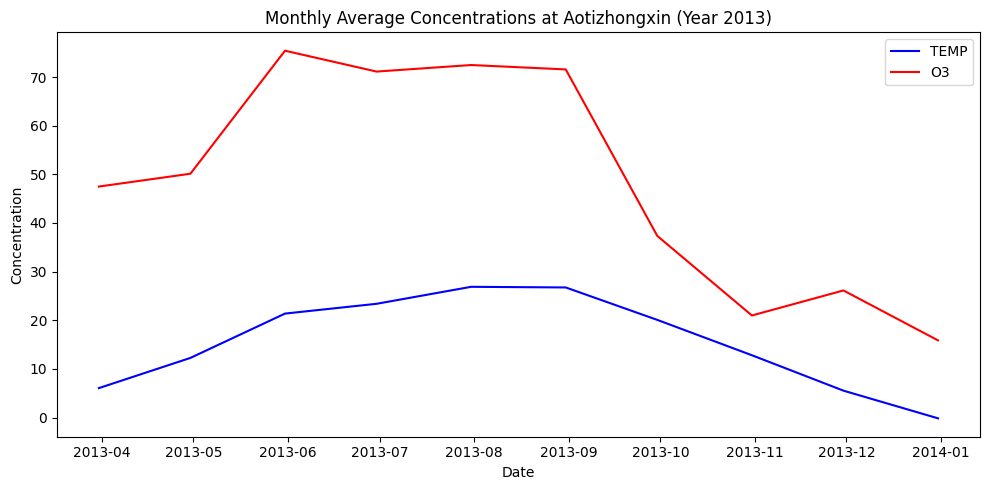

In [61]:
# Membuat indeks datetime dari kolom year, month, day, dan hour
data_clean['datetime'] = pd.to_datetime(data_clean[['year', 'month', 'day', 'hour']])

# Mengatur datetime sebagai indeks
data_clean.set_index('datetime', inplace=True)

# Memfilter data untuk tahun 2013 dan stasiun 'Aotizhongxin'
data_2013_aotizhongxin = data_clean[(data_clean.index.year == 2013) & (data_clean['station'] == 'Aotizhongxin')]

# Menghitung rata-rata bulanan untuk TEMP dan O3 untuk tahun 2013 di stasiun 'Aotizhongxin'
monthly_avg_TEMP = data_2013_aotizhongxin['TEMP'].resample('M').mean()
monthly_avg_O3 = data_2013_aotizhongxin['O3'].resample('M').mean()

# Plot time series untuk rata-rata bulanan TEMP dan O3 untuk tahun 2013 di stasiun 'Aotizhongxin'
plt.figure(figsize=(10, 5))

plt.plot(monthly_avg_TEMP.index, monthly_avg_TEMP, label='TEMP', color='blue')
plt.plot(monthly_avg_O3.index, monthly_avg_O3, label='O3', color='red')

plt.title('Monthly Average Concentrations at Aotizhongxin (Year 2013)')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()

plt.tight_layout()
plt.show()


## Conclusion


Berdasarkan visualisasi yang sudah dibuat, ini merupakan kesimpulan yang bisa kita ambil:

1. Bagaimana kualitas udara berdasarkan parameter SO2 di setiap stasiun sepanjang tahun 2013?

    * Berdasarkan visualisasi yang sudah ada dapat di simpulkan bahwasanya udara di setiap statiun sangat baik. Namun terdapat beberapa hari yang memiliki kualitas udaranya "fair" dan "hazardous" di sepanjang tahun 2013. Untuk kualitas udara fair masih sangat wajar dikarenakan sangat mungkin terjadinya lonjakan kadar SO2 di udara sedangkan untuk kualitas udara "hazardous" terjadi dikarenakan ada beberapa data pada column SO2 memiliki nilai yang sangat besar sehingga mempengaruhi rata rata konsentrasi SO2 di udara. 

    * Pengelompokan kadar SO2 saya ambil berdasarkan referensi dari website: https://www.epa.vic.gov.au/for-community/environmental-information/air-quality/sulfur-dioxide-in-the-air.
    
    * Secara umum sepanjang tahun 2013 di seluruh statiun memiliki kualitas udara yang sangat baik.
    
2. Bagaimana dampak kandungan O3 terhadap kondisi temperature pada satu statiun?

    * Berdasarkan visualisasi diatas dapat kita liat bahwasanya setiap naiknya konsentrasi O3 akan mempengaruhi kenaikan suhu atau temperature pada statiun Aotizhongxin. Namun terdapat perbedaaan saat bulan 6 dan 7 dimana penurunan konsentrasi O3 tidak membuat suhu menurun. Hal ini sesuai dengan korelasi antara 'TEMP' and 'O3' yang hanya berkisar 0.53. korelasi positif menandakan hubungan satu variabel meningkat jika variabel lainnya meningkat, atau satu variabel menurun sementara yang lainnya juga menurun dan Korelasi 0.53 artinya mereka memiliki hubungan yang tidak sangat kuat tetapi tetap mampu saling mempengaruhi. 